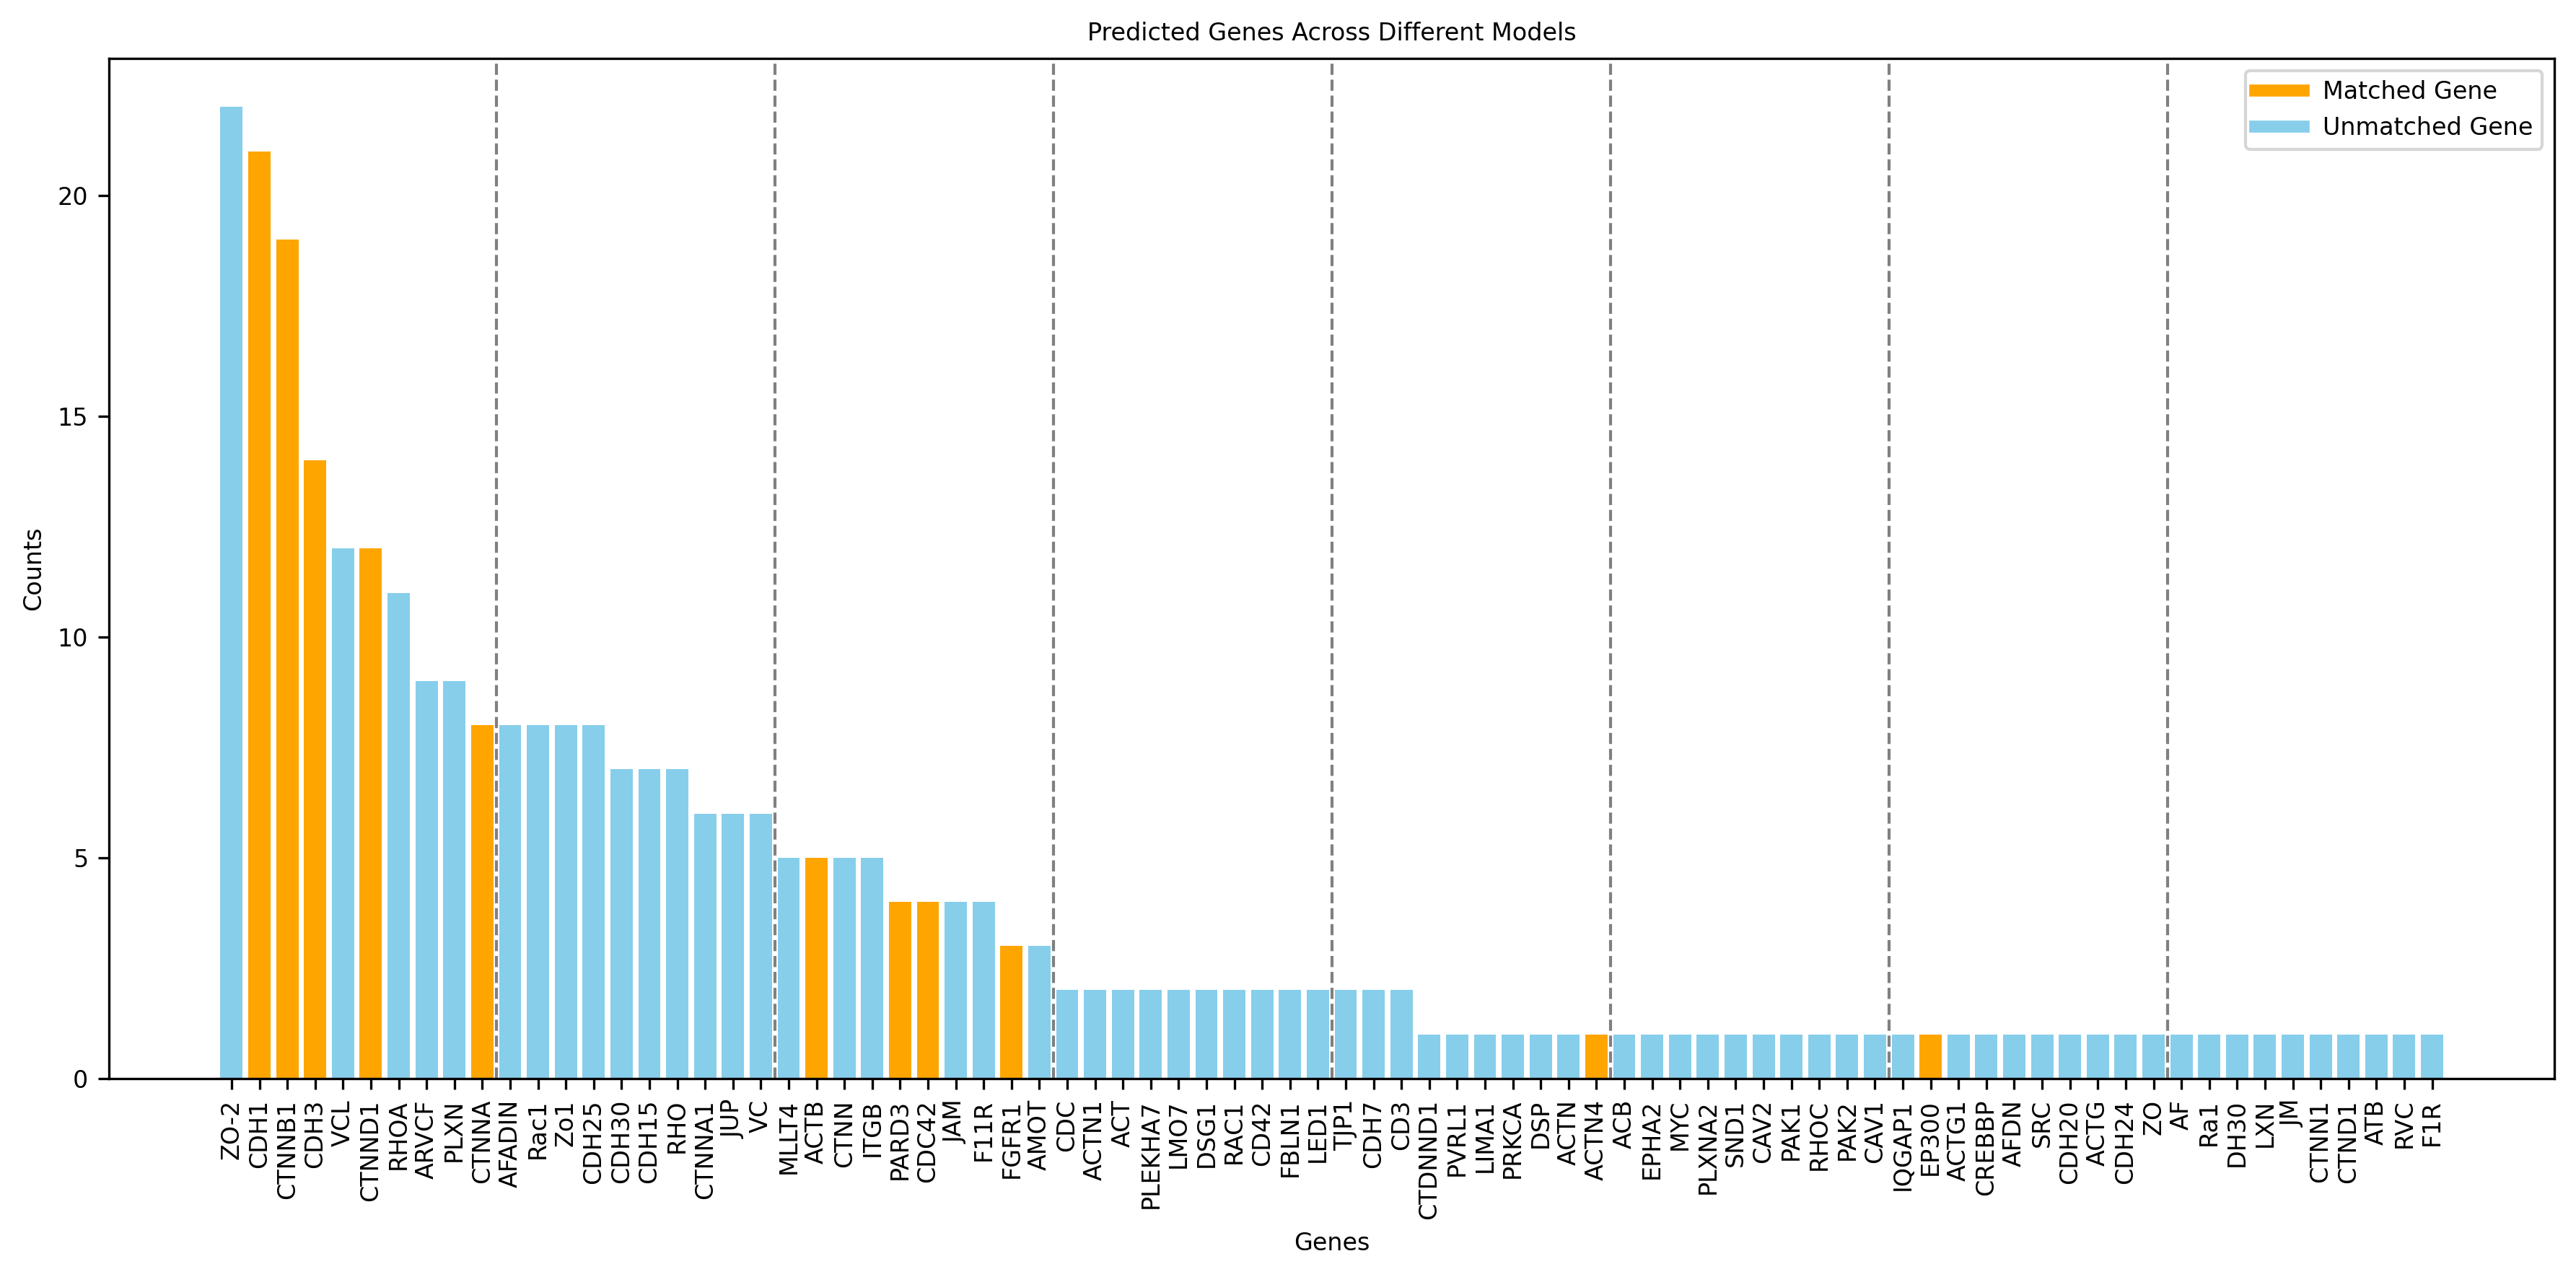

In [1]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='Arial')
ax1.set_ylabel('Counts', fontsize=8, fontname='Arial')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='Arial')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black', labelrotation=90)
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


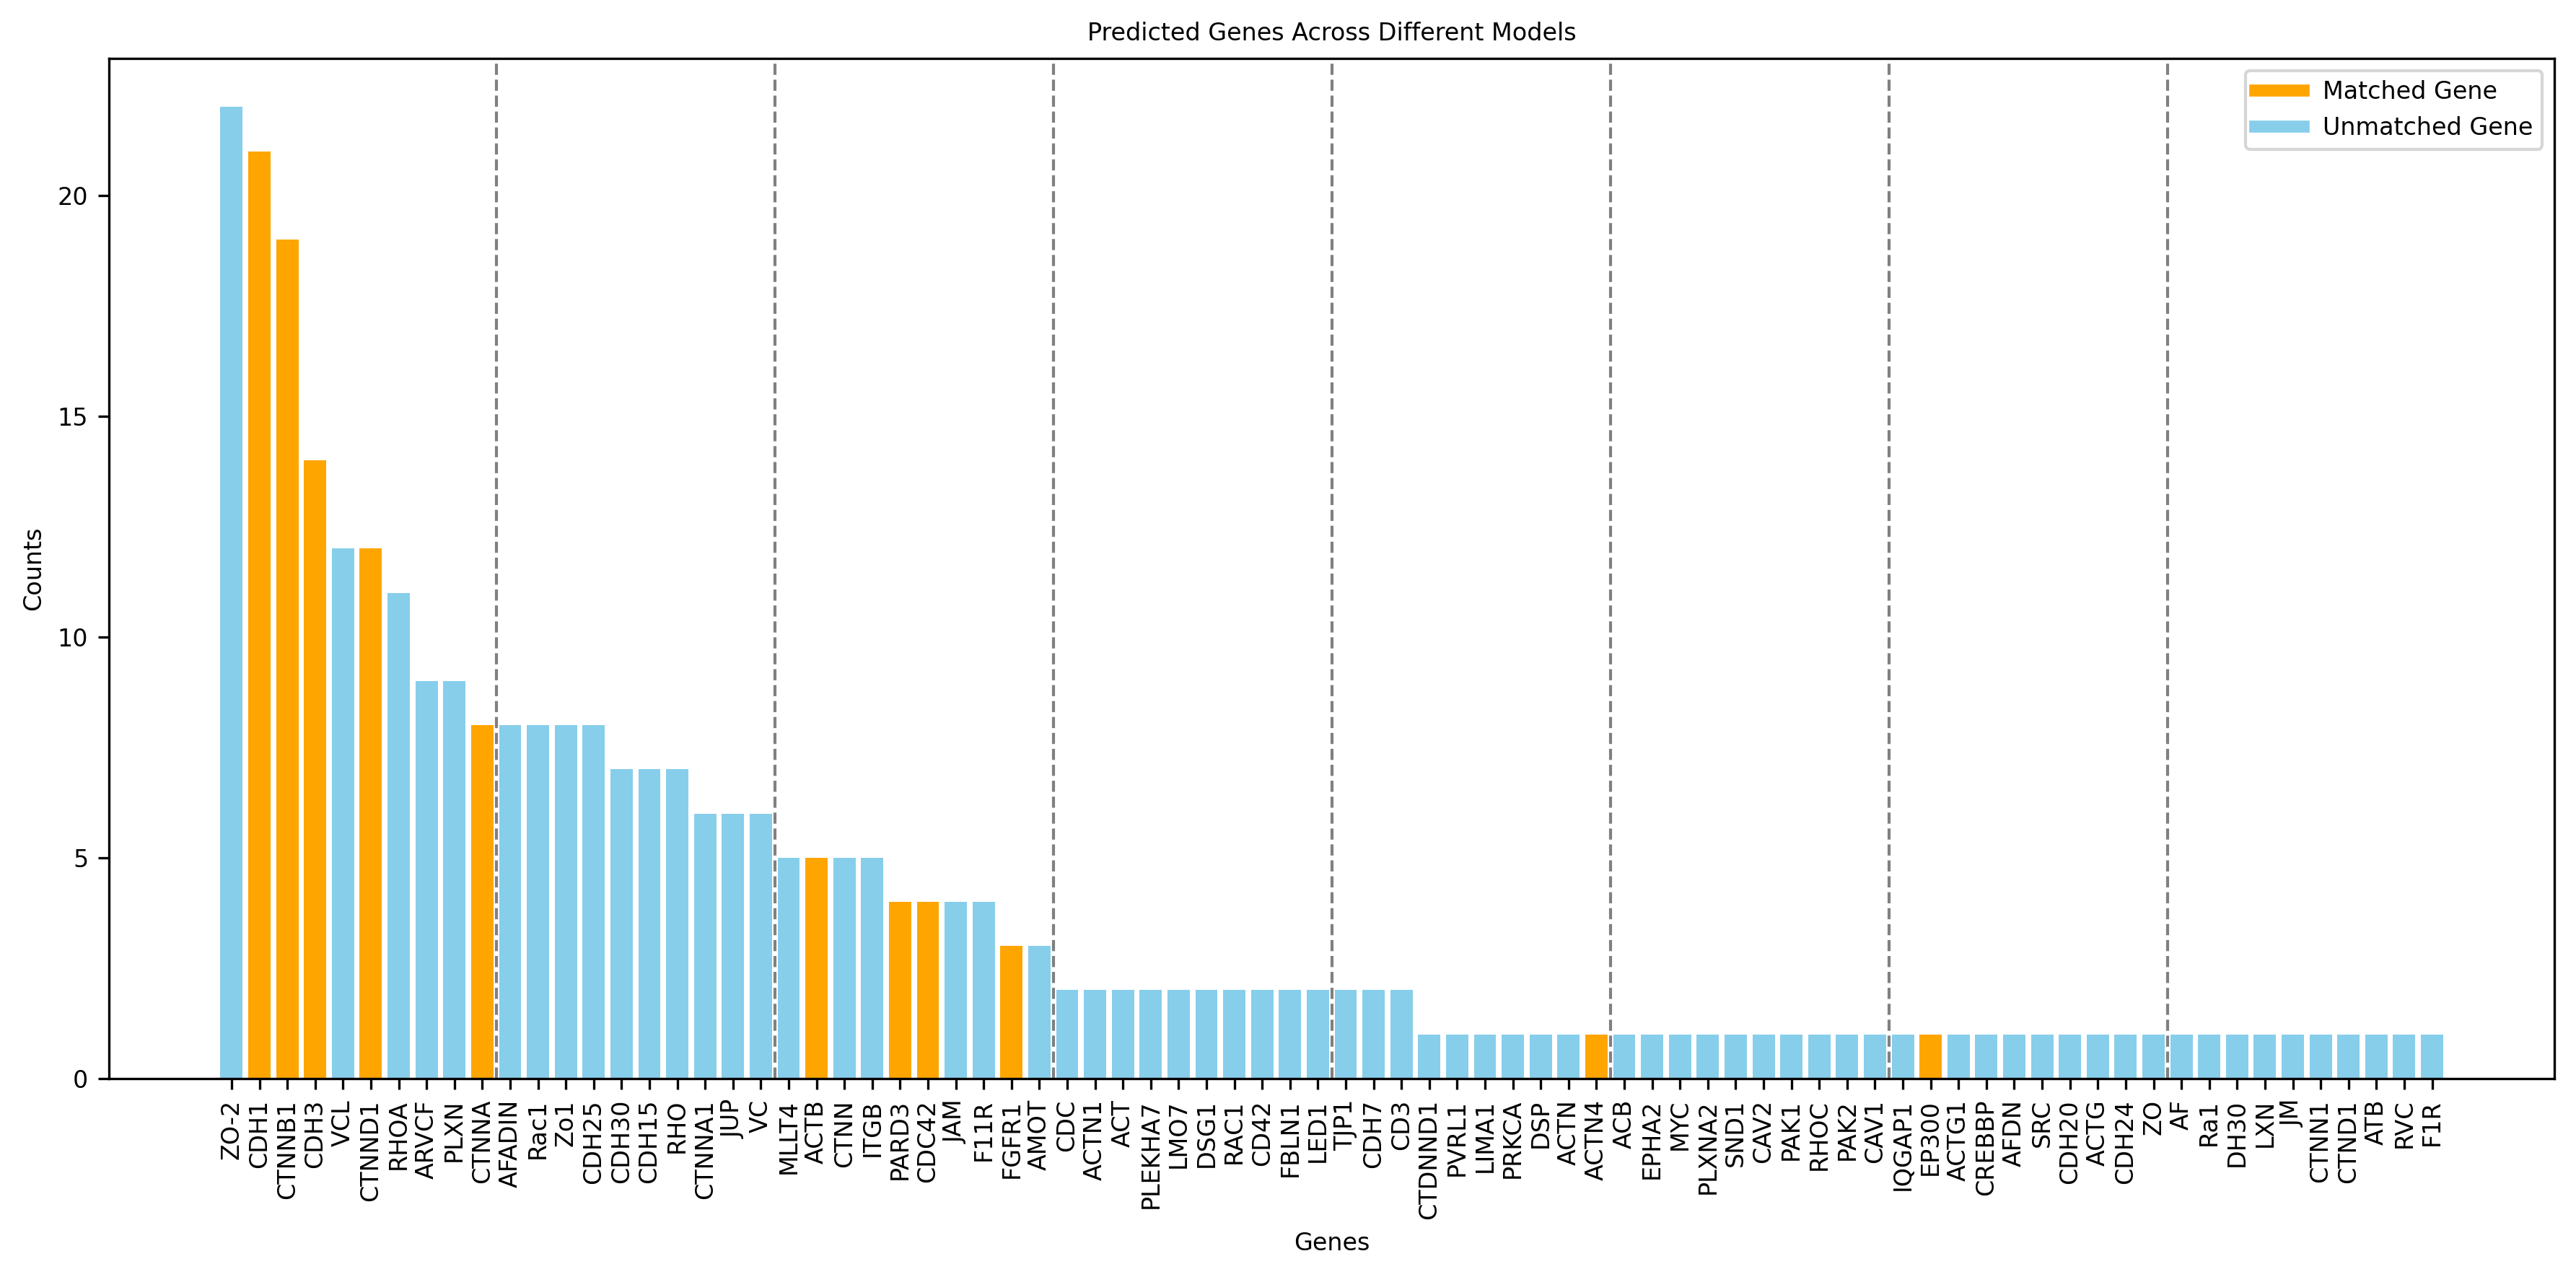

In [2]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='DejaVu Sans')
ax1.set_ylabel('Counts', fontsize=8, fontname='DejaVu Sans')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='DejaVu Sans')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black', labelrotation=90)
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


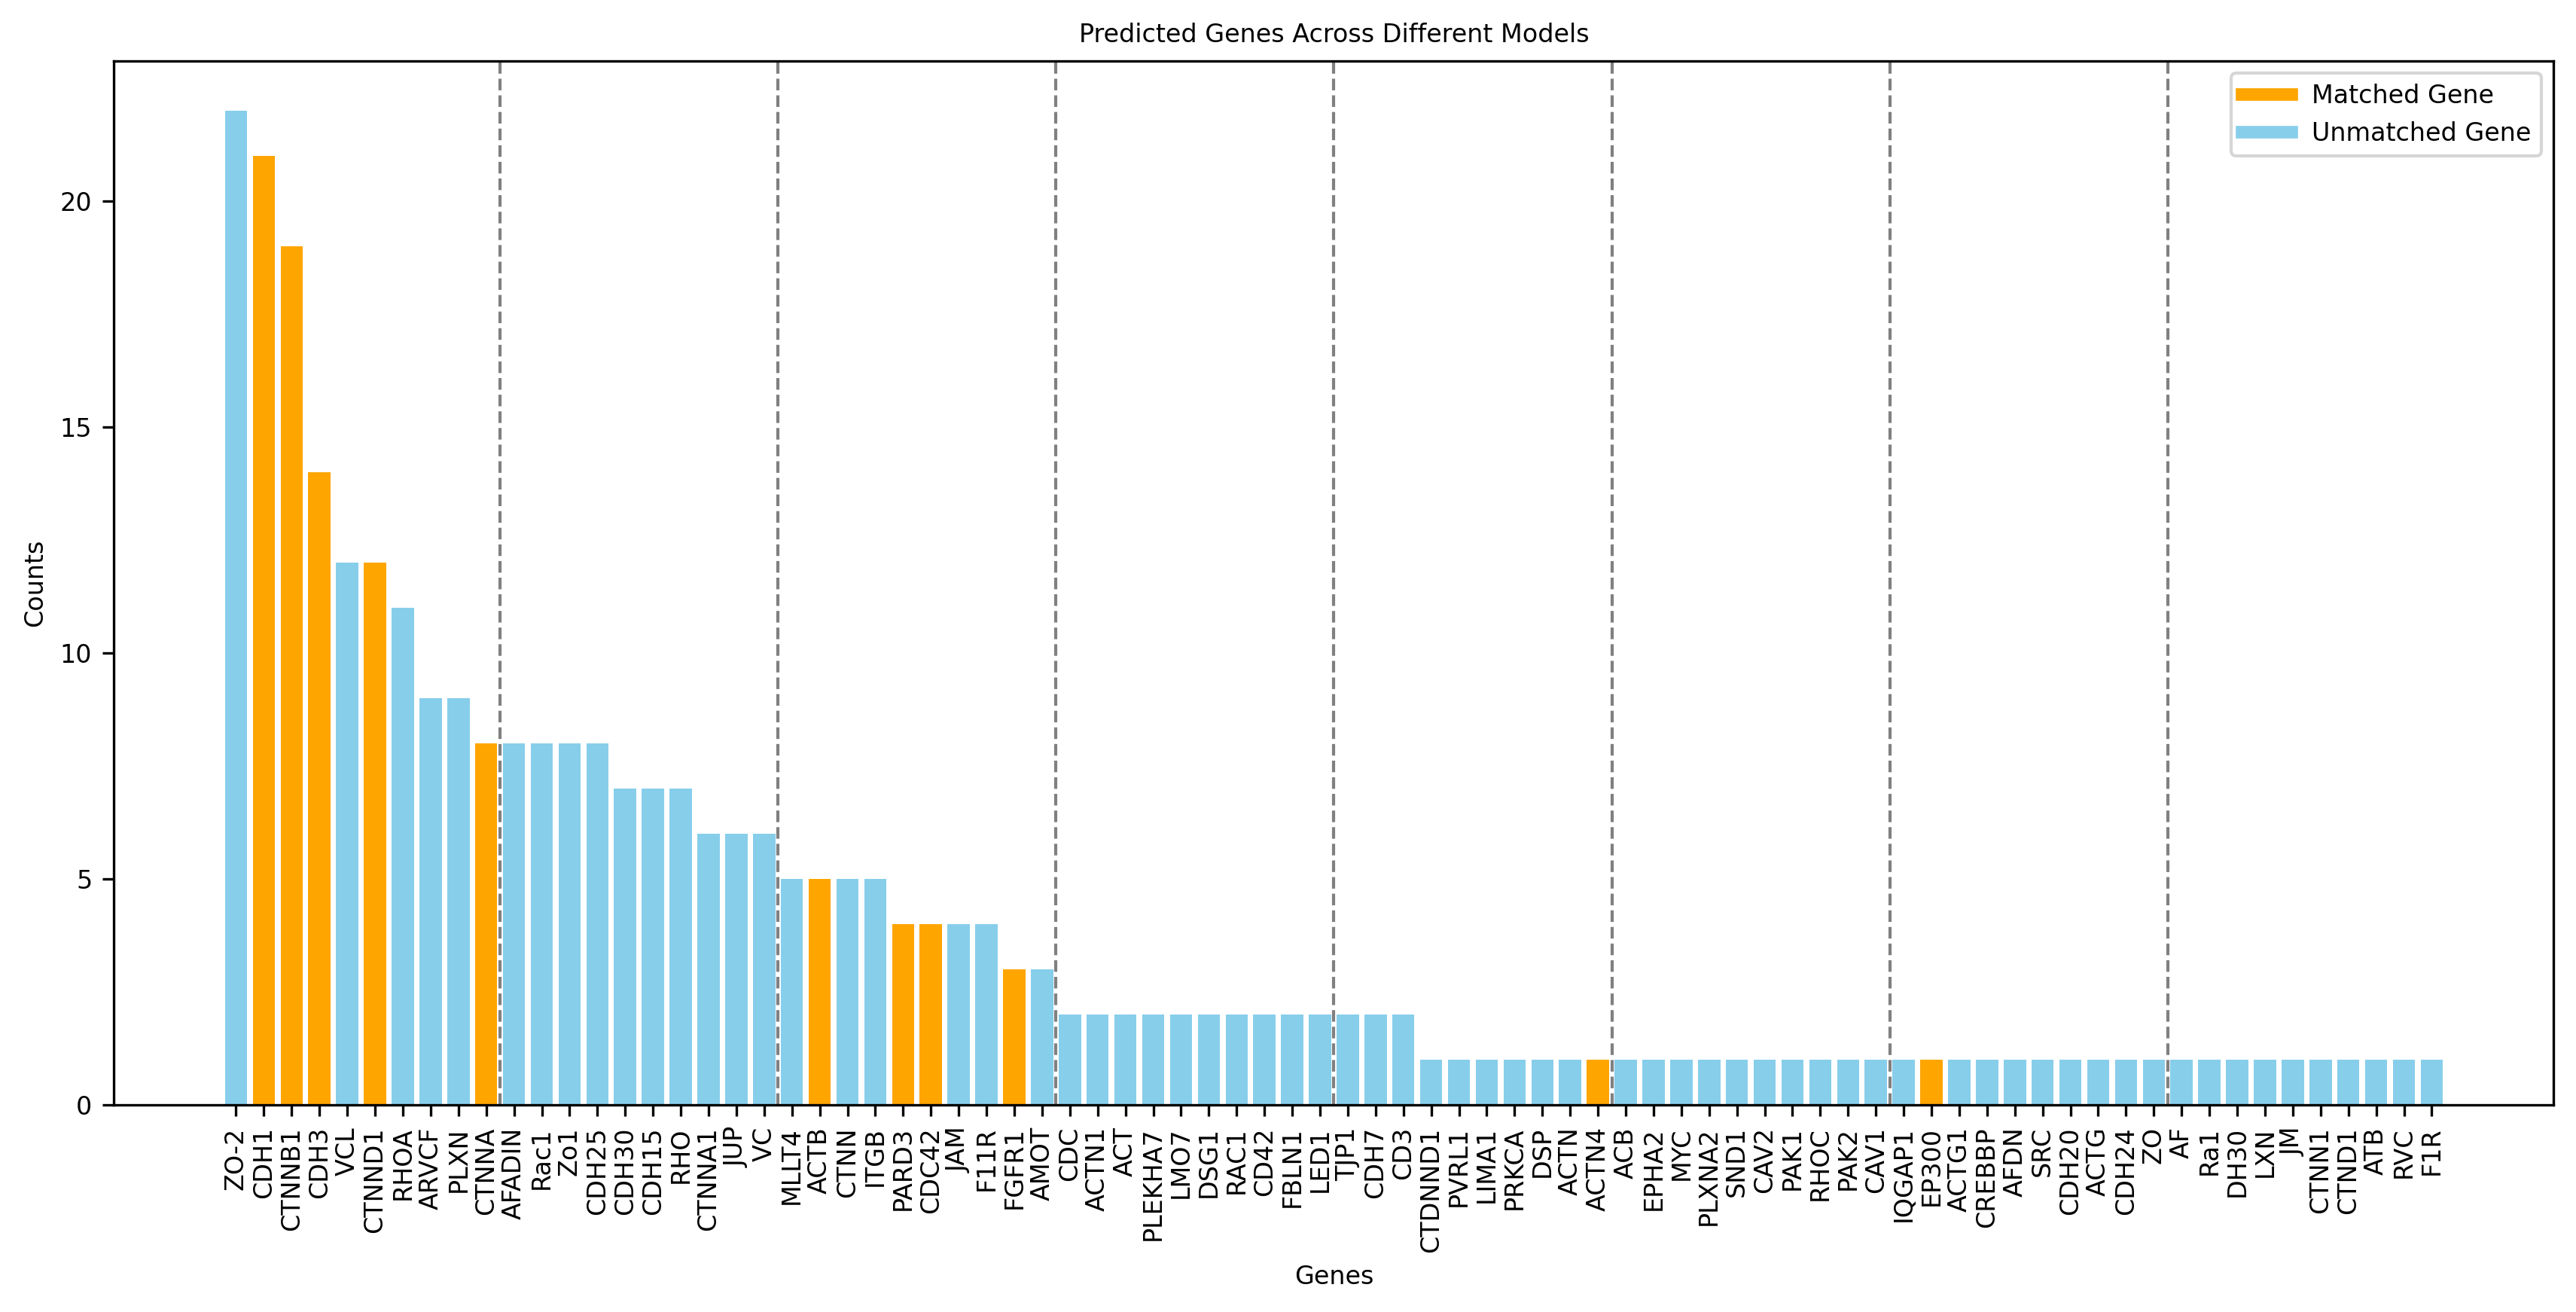

In [3]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='DejaVu Sans')
ax1.set_ylabel('Counts', fontsize=8, fontname='DejaVu Sans')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='DejaVu Sans')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black', labelrotation=90)
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout and remove space on the sides
plt.subplots_adjust(left=0.05, right=0.95)

# Save the figure with adjusted layout
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


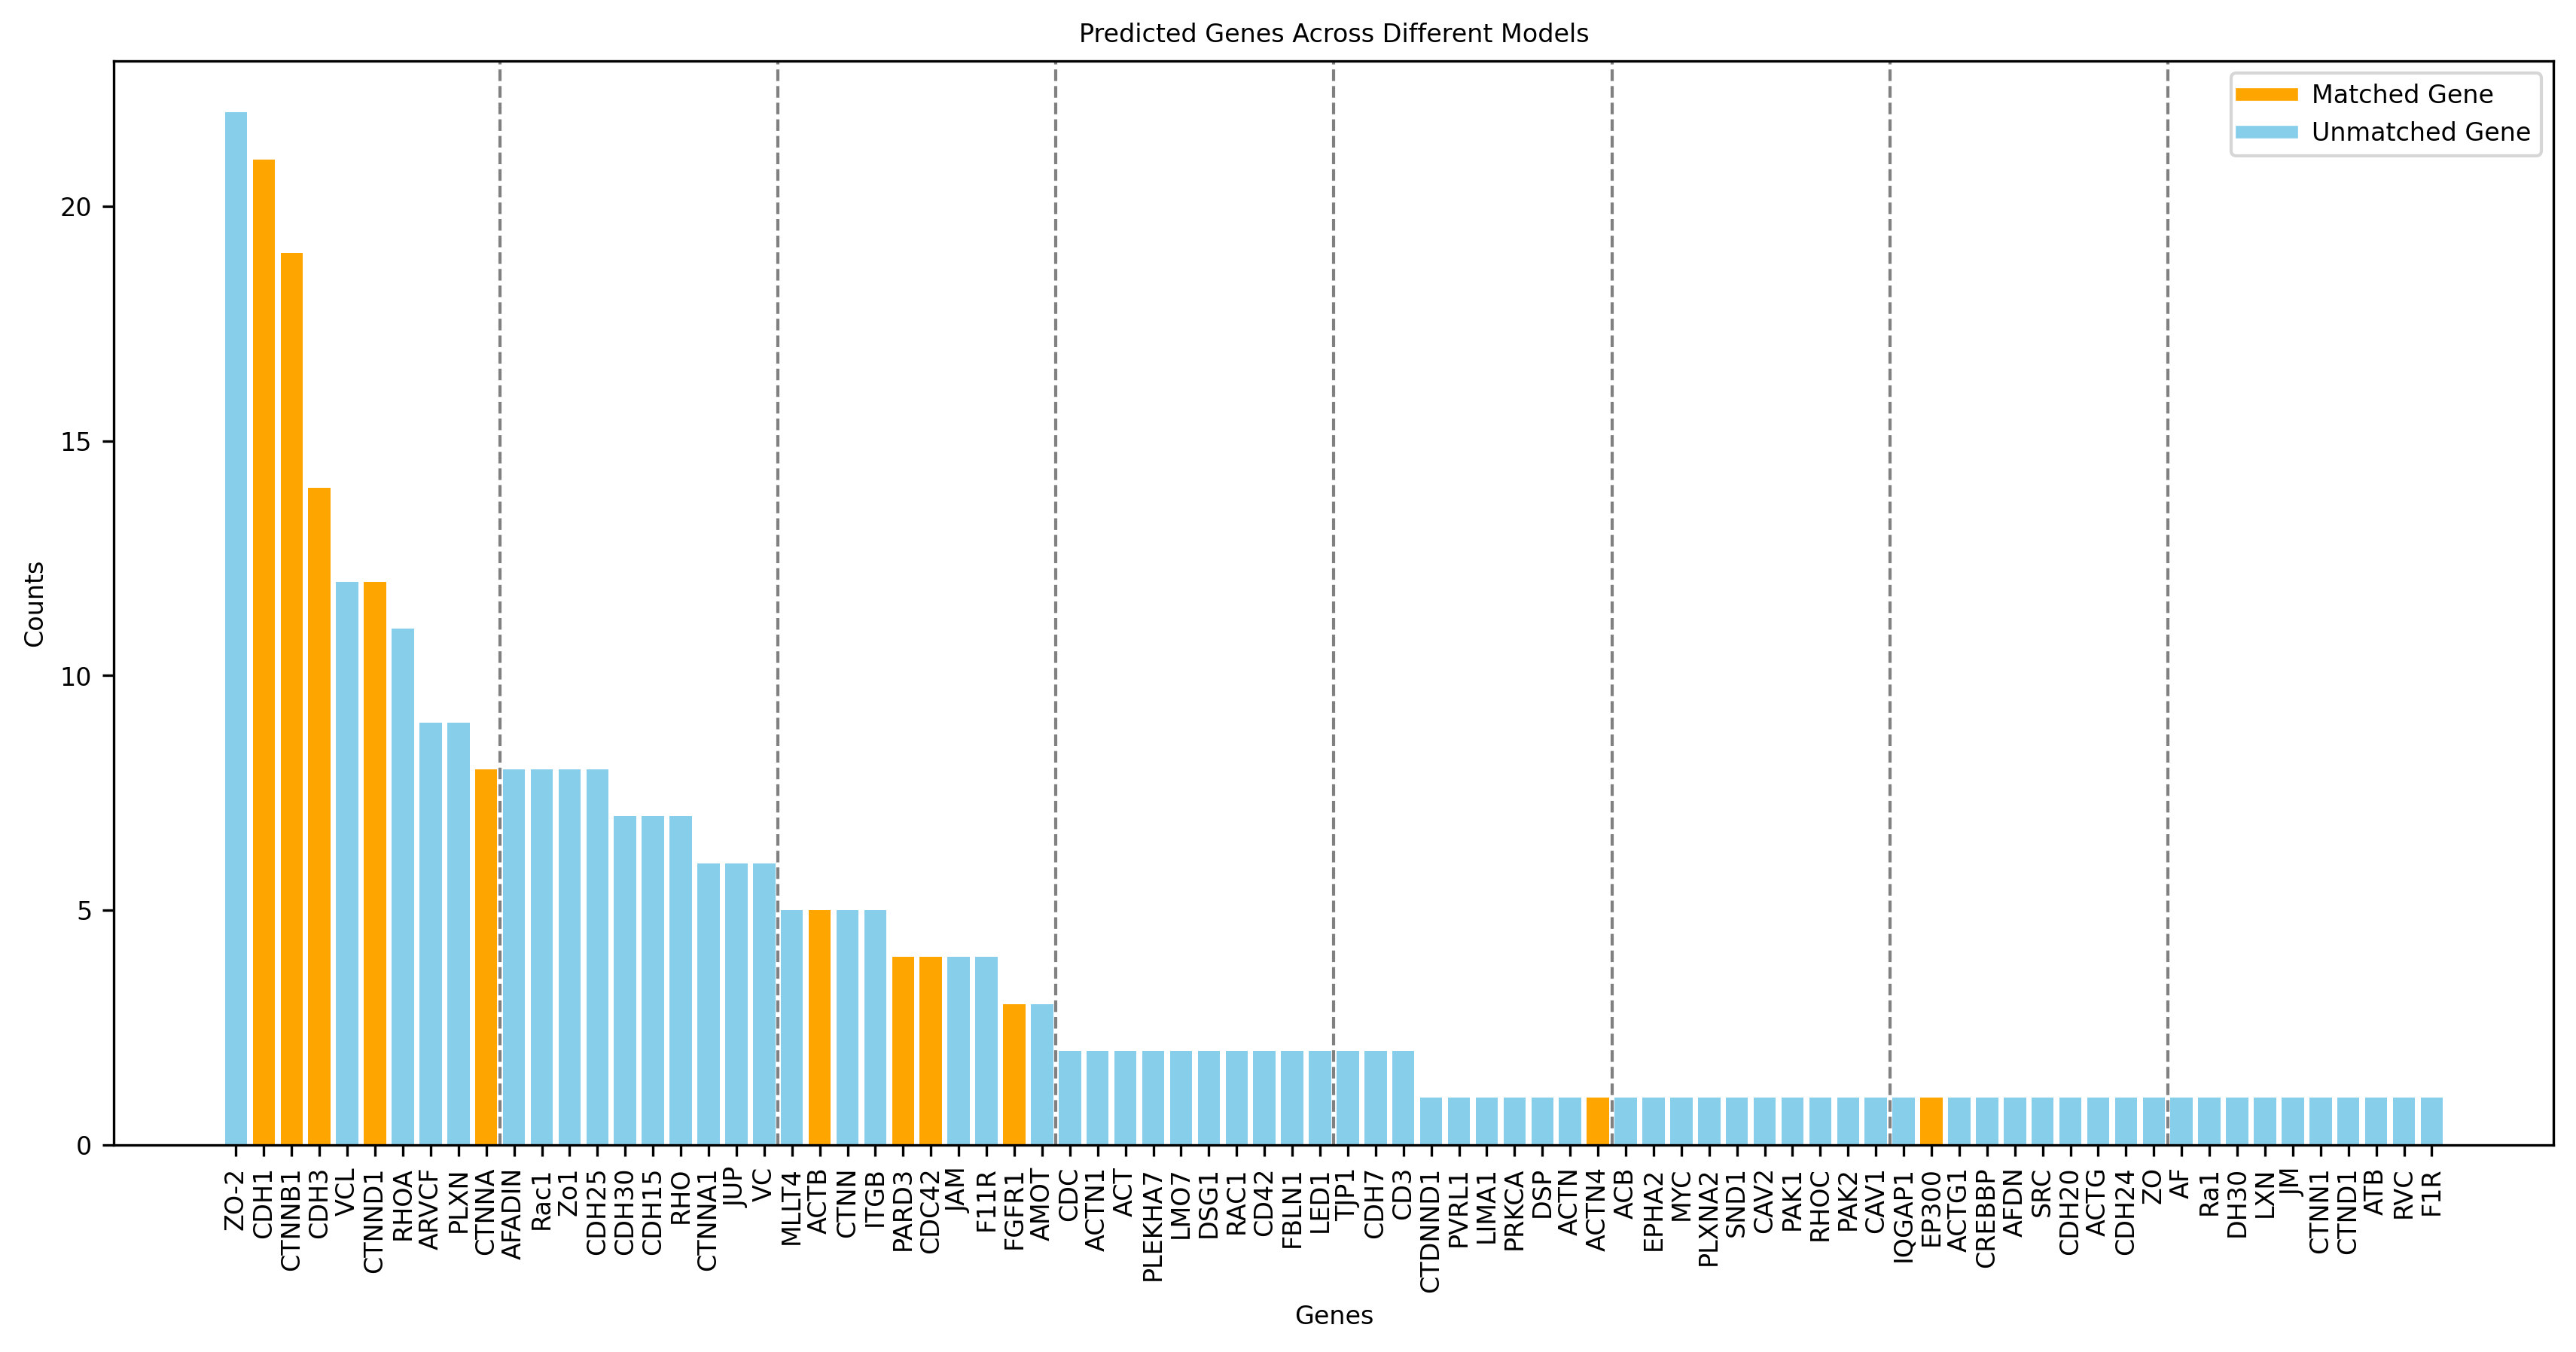

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='DejaVu Sans')
ax1.set_ylabel('Counts', fontsize=8, fontname='DejaVu Sans')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='DejaVu Sans')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black')
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout and remove space on the sides
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)

# Save the figure with adjusted layout
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


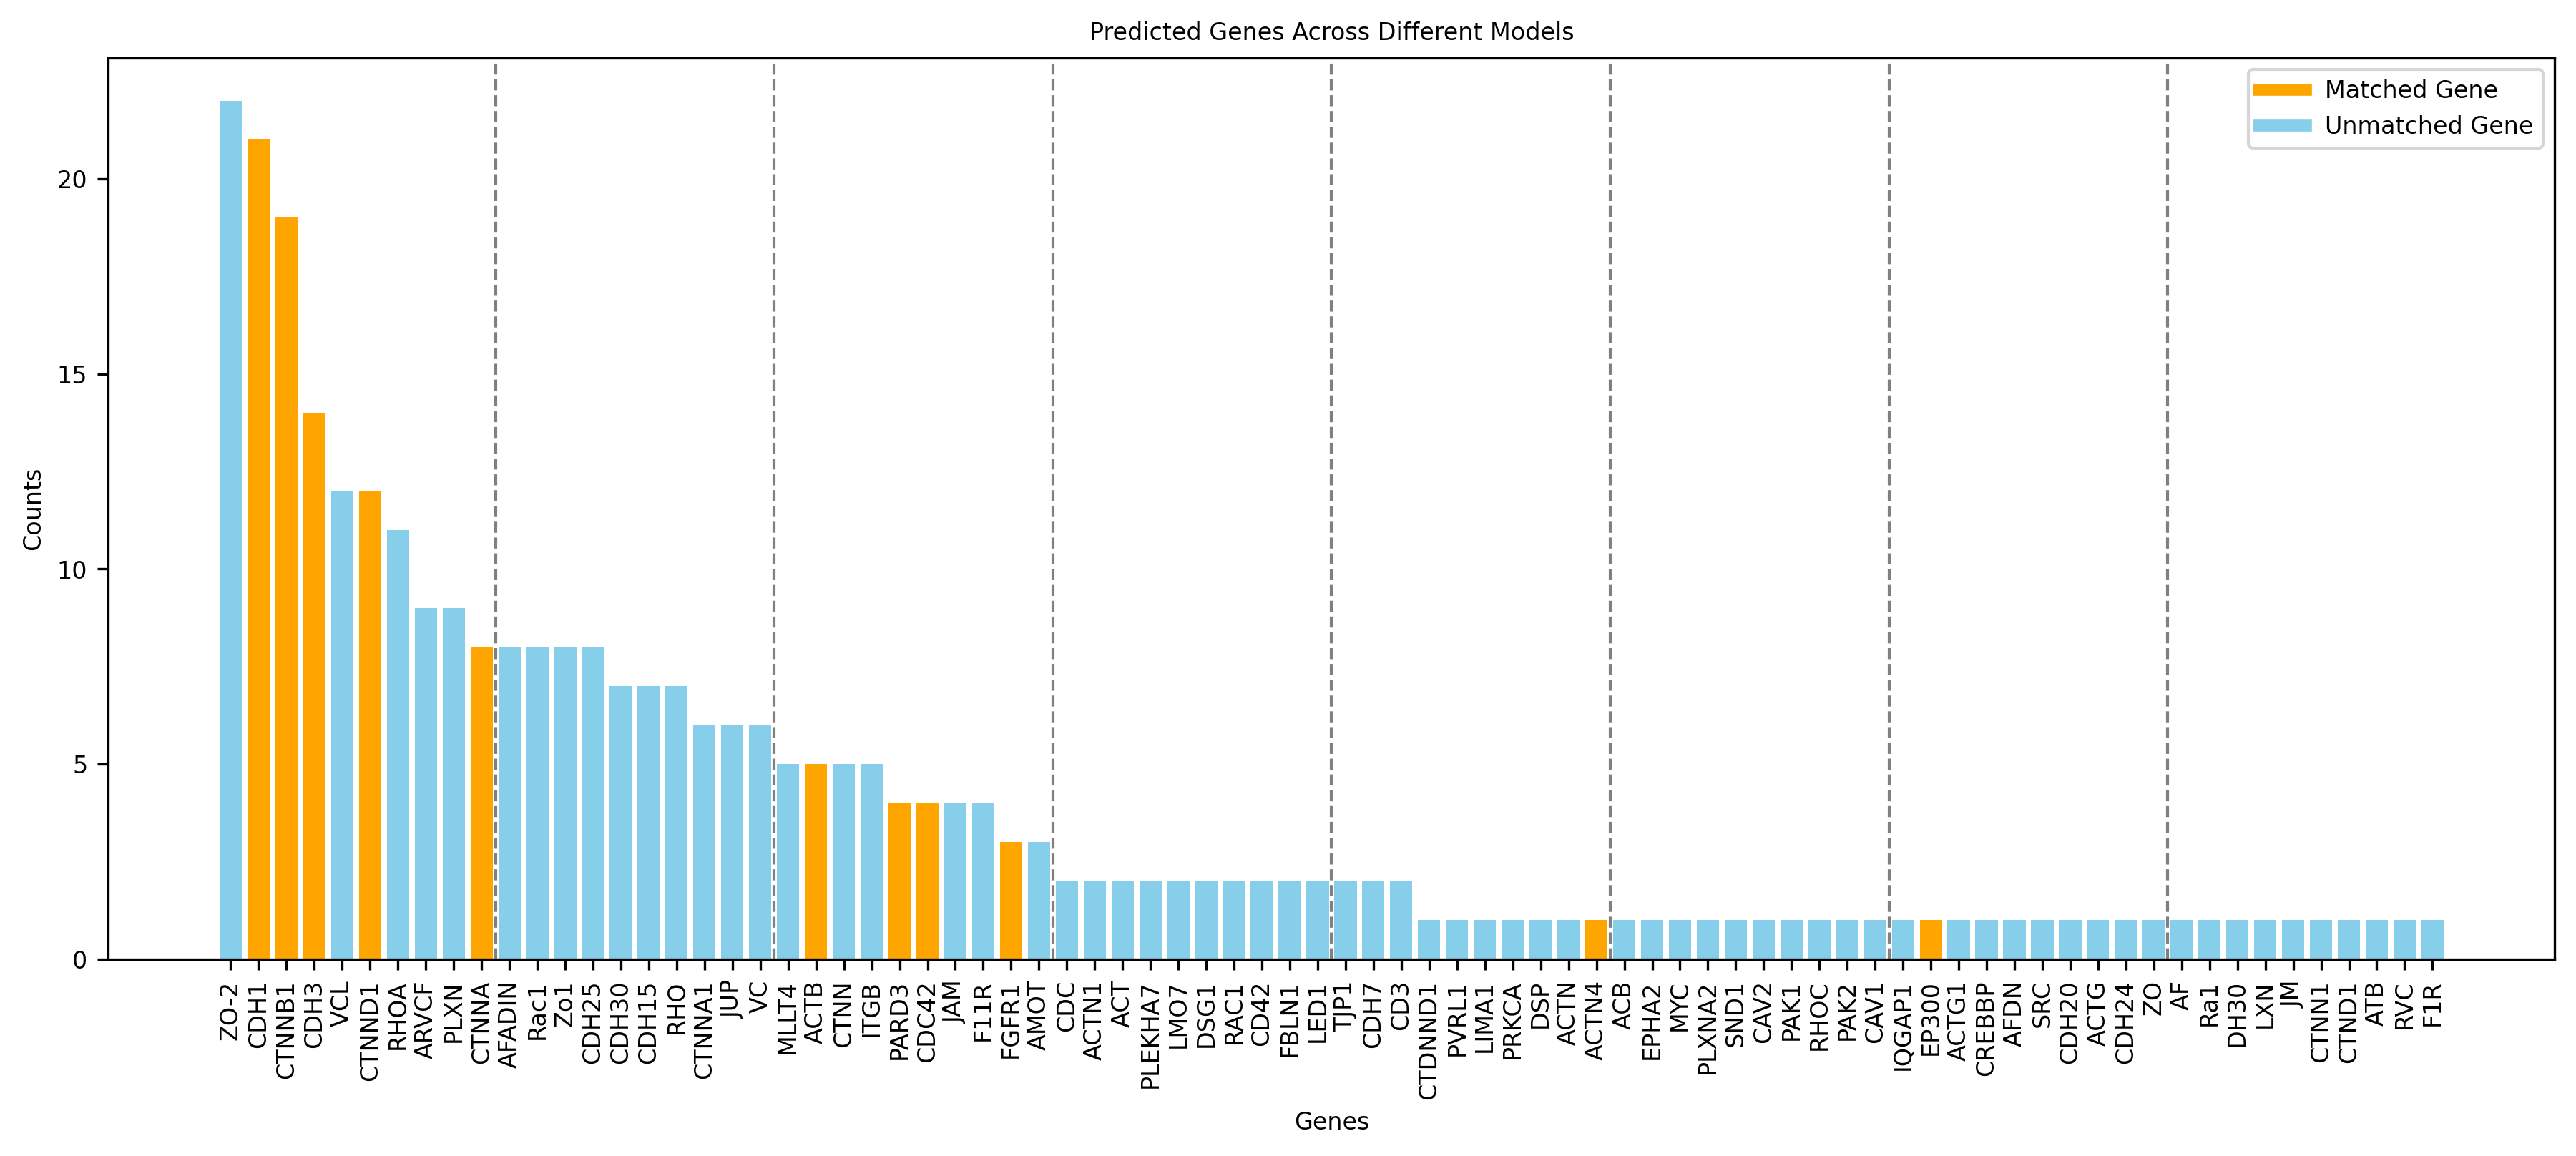

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='DejaVu Sans')
ax1.set_ylabel('Counts', fontsize=8, fontname='DejaVu Sans')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='DejaVu Sans')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black')
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout and remove space on the sides
plt.subplots_adjust(left=0.04, right=0.99, top=0.95, bottom=0.25)

# Save the figure with adjusted layout
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


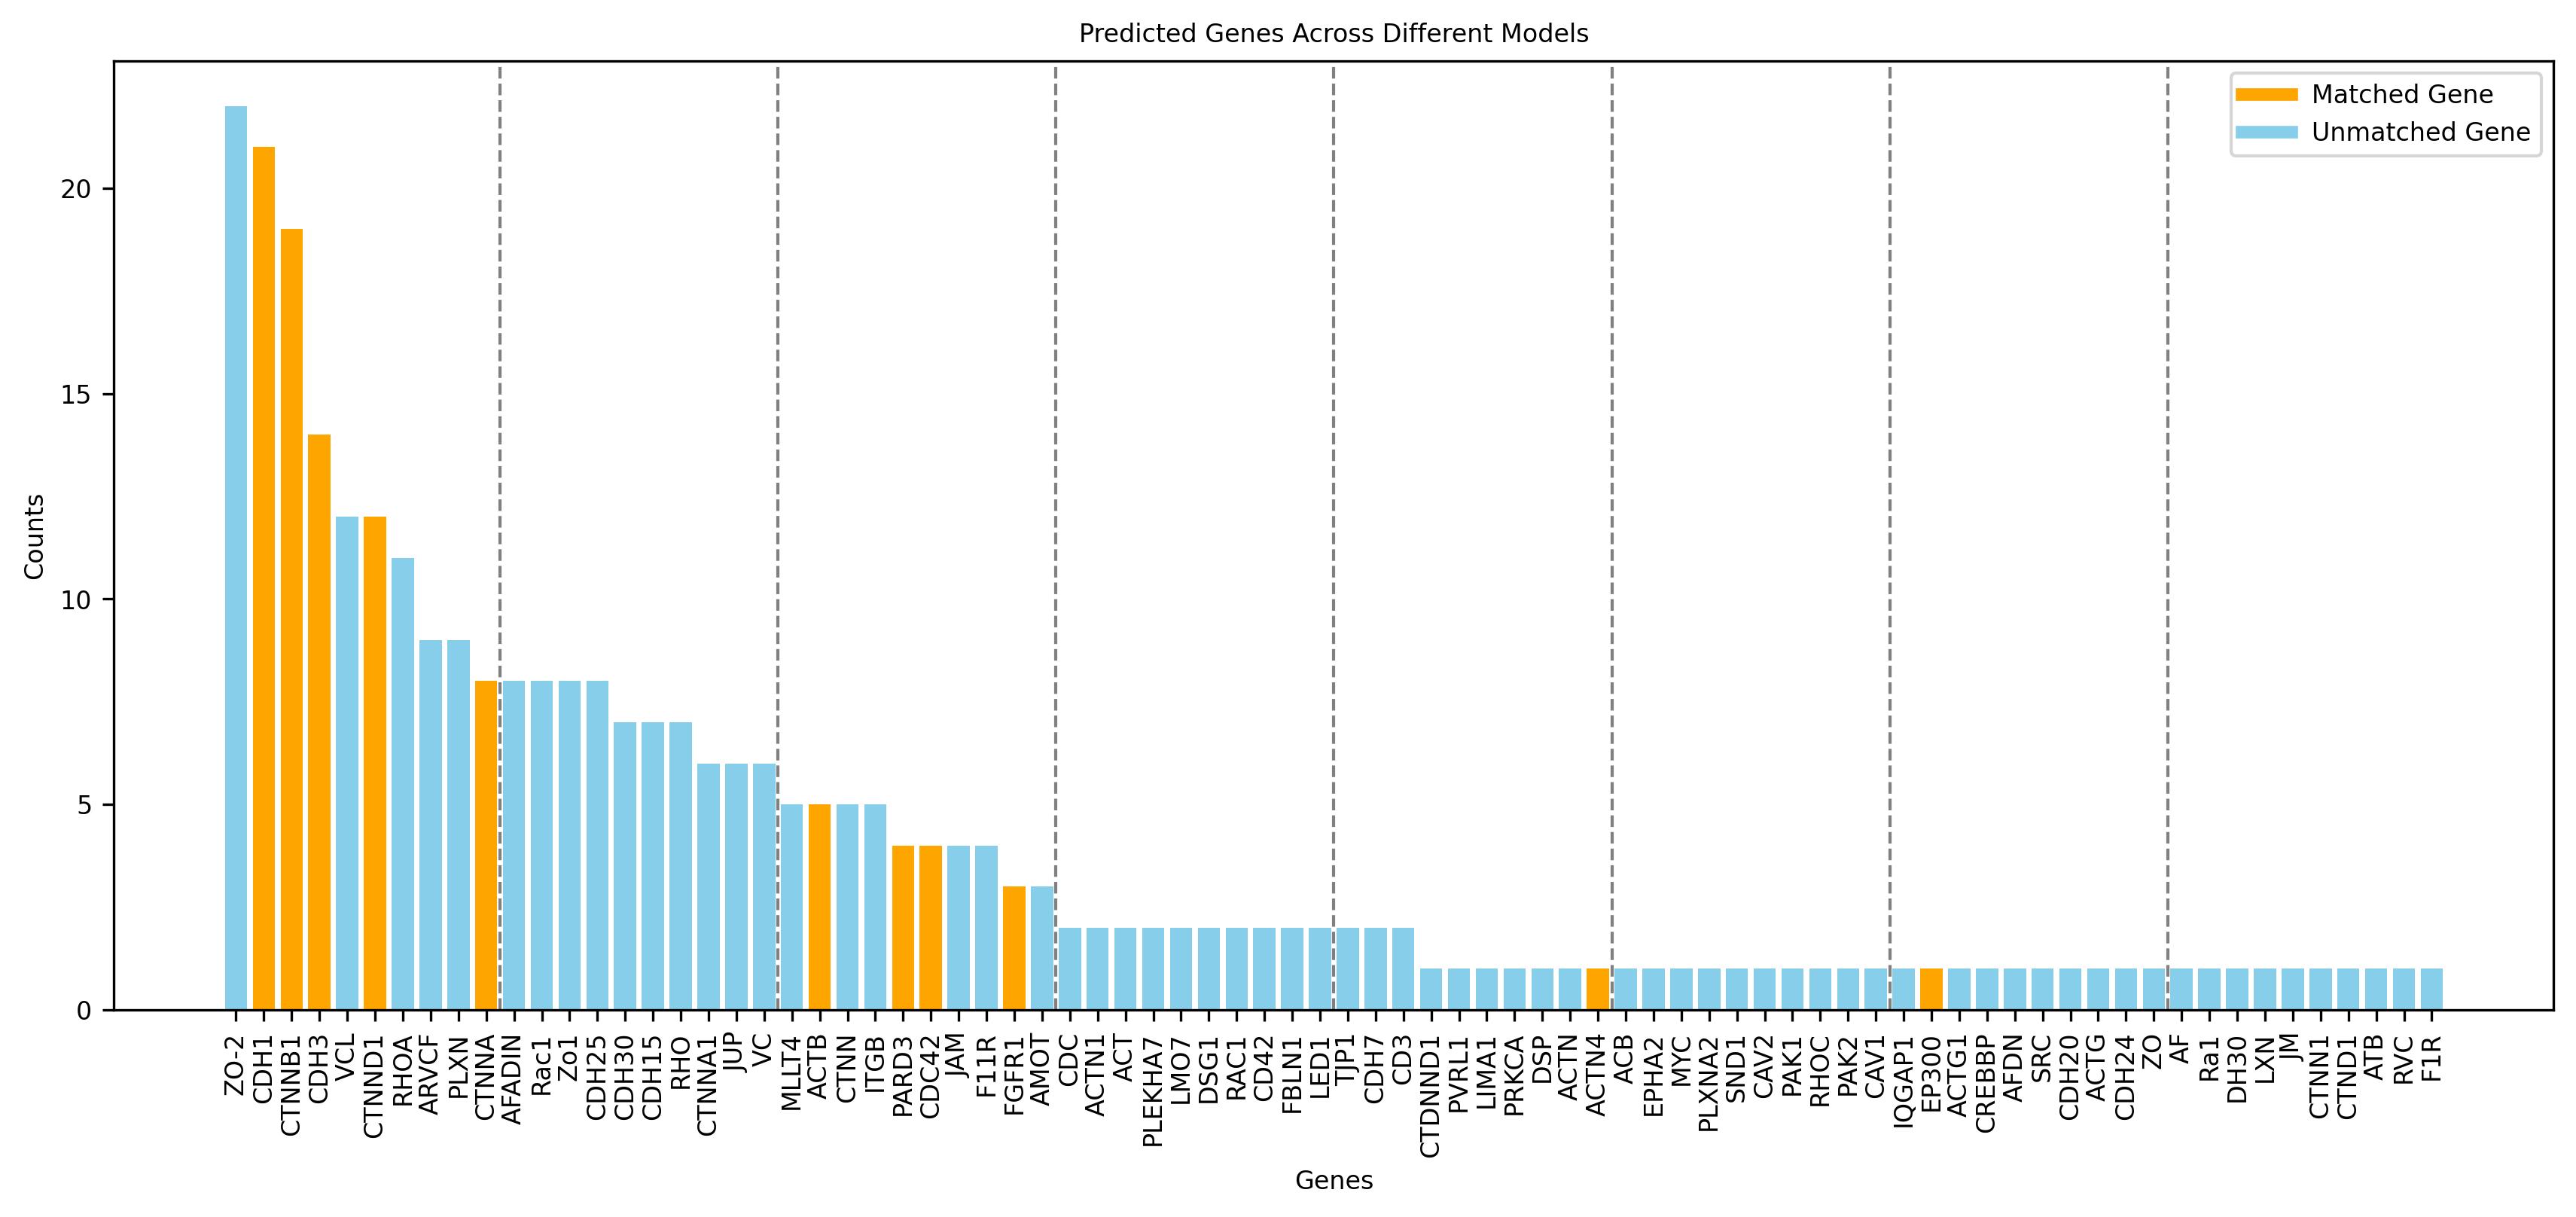

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Plotting setup for Figure A
fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

# Colors for matched and unmatched genes
colors = ['orange' if gene in ground_truth else 'skyblue' for gene in sorted_genes]

# Plot the gene counts
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors)

# Add labels and title
ax1.set_xlabel('Genes', fontsize=8, fontname='DejaVu Sans')
ax1.set_ylabel('Counts', fontsize=8, fontname='DejaVu Sans')
ax1.set_title('Predicted Genes Across Different Models', fontsize=8, fontname='DejaVu Sans')

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=90, labelsize=8, labelcolor='black')
ax1.tick_params(axis='y', labelsize=8, labelcolor='black')

# Adding lines for gene ranges
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)

# Create custom legends
legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Matched Gene'),
                   Line2D([0], [0], color='skyblue', lw=4, label='Unmatched Gene')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Adjust layout to remove extra space
plt.tight_layout(pad=0.1)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.25)

# Save the figure with adjusted layout
plt.savefig('figure_A.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


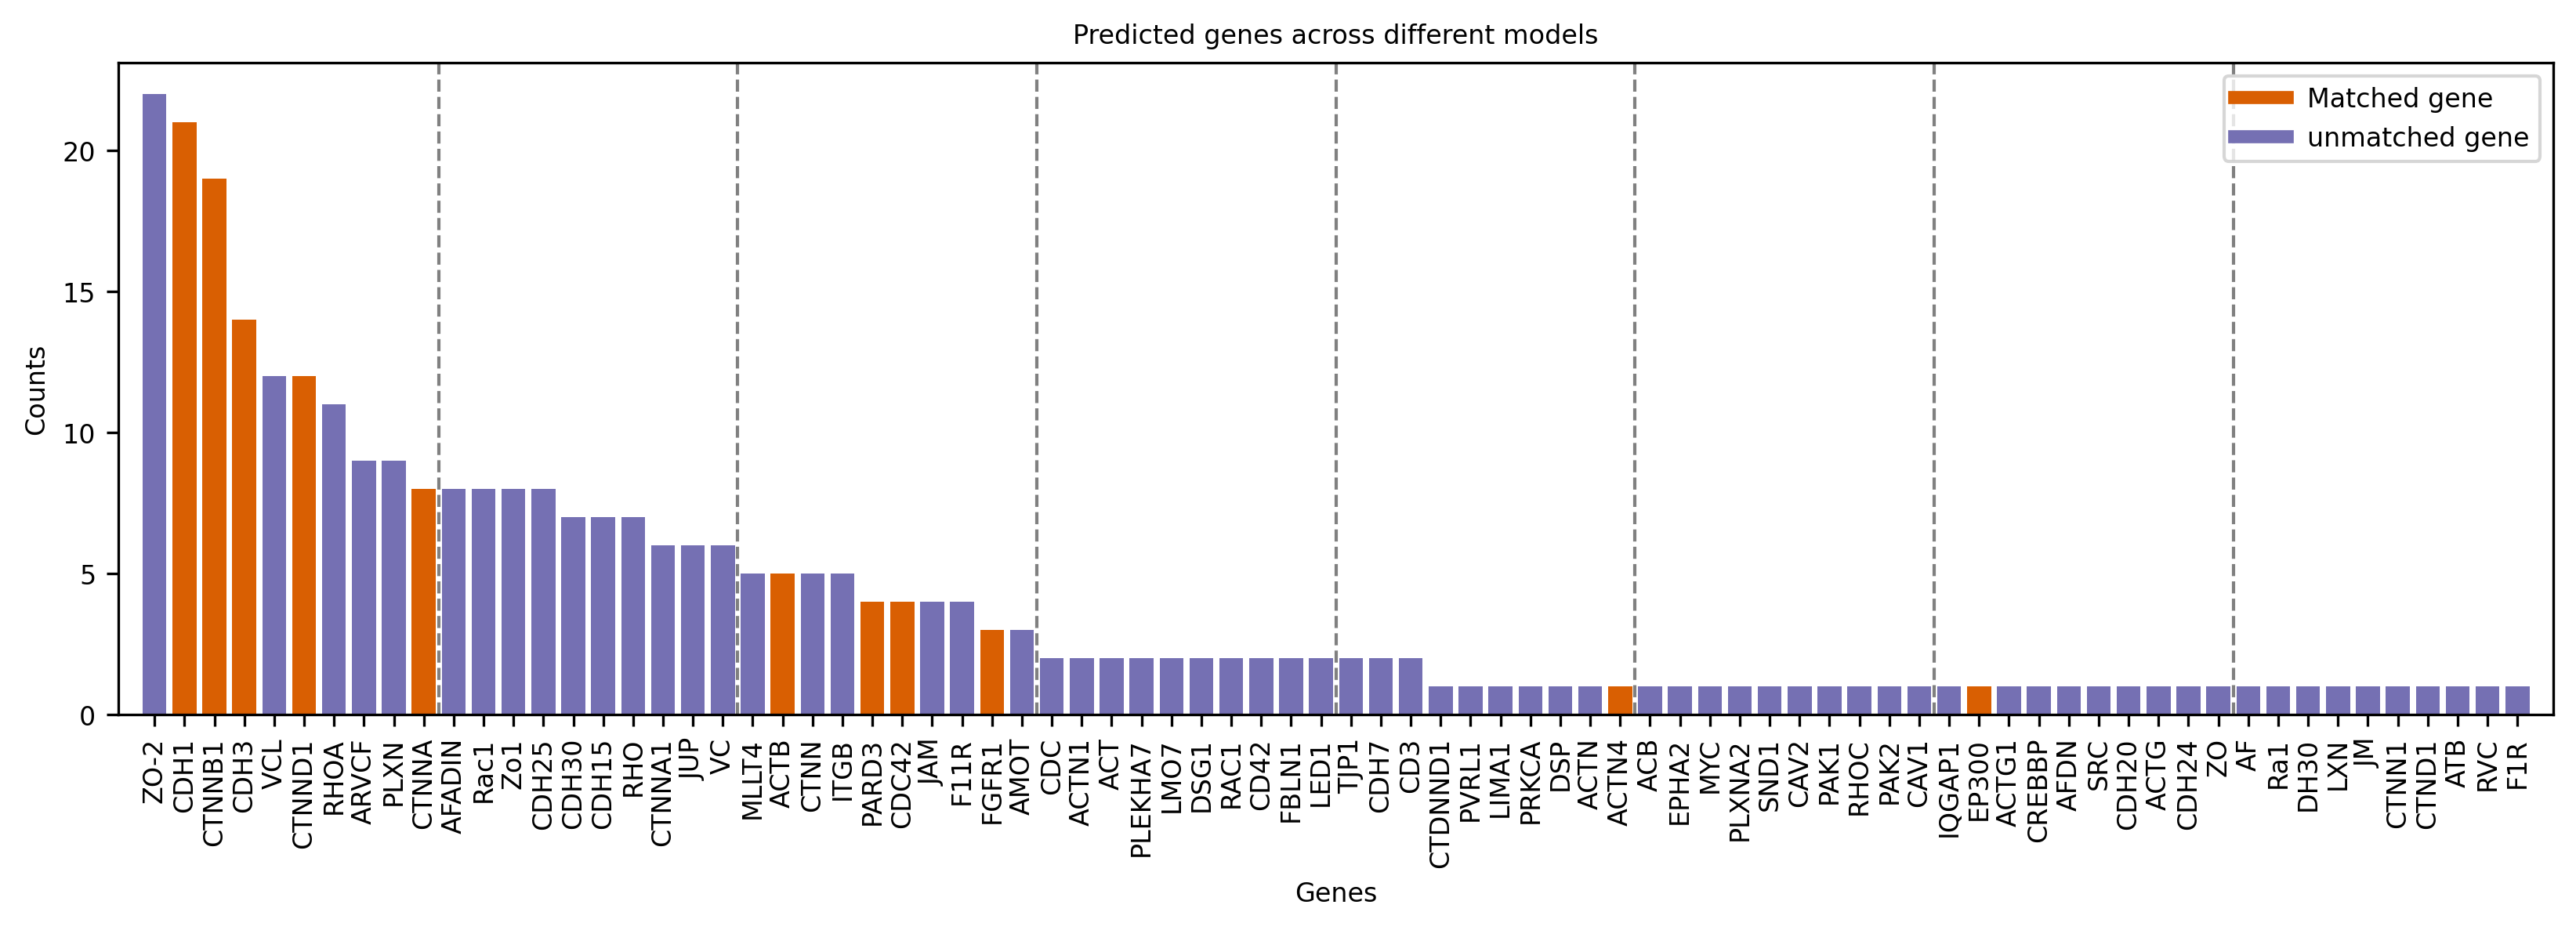

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D

# Predicted gene lists from different models
predicted_genes = {
    "Claude": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "CTDNND1", "CDC", "ACTN1", "ACT", "PVRL1", "MLLT4", "LIMA1", "PRKCA", "MLLT4", "VCL", "DSP"],
    "Claude-Instant": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CDC", "ACTN", "ACT", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL", "AFADIN"],
    "cohere": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "ACTN4", "CTNNA1", "CD42", "ACB", "EPHA2", "FBLN1", "LED1", "MYC", "PLXNA2", "SND1"],
    "GPT-3.5": ["CTNND1", "CDH1", "CDC42", "CTNNB1", "CTNNA1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "GPT-4": ["CTNND1", "CDH1", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CAV2", "PAK1", "AMOT", "RHOC", "PAK2", "CAV1", "IQGAP1"],
    "Claude-Pro": ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "TJP1", "ACTG1", "CREBBP", "AFDN", "SRC", "VCL"],
    "Palm2": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNN", "CDH20", "CDH25", "ACTG", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Bard": ["CTNND1", "CDH1", "CDH3", "ACTB", "CTNNB1", "CTNNA1", "ACTN1", "F11R", "CDH24", "TJP1", "ZO", "JAM", "PLXN", "AF"],
    "Codellama-34": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "PARD3", "CTNNA1", "CDH7", "CTNN", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "CTNN", "FBLN1", "LED1"],
    "Wizardlm-70": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JUP", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1"],
    "Wizardlm-13": ["CDH1", "CDH3", "CTNNB1", "CTNNA1", "Rac1", "ZO-2", "Zo1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN"],
    "Falcon-180b": ["CTNND1", "CDH1", "CDH3", "CDC42", "CTNNB1", "CTNNA1", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Mistral-7b": ["CDH1", "CDH3", "FGFR1", "CTNNB1", "Rac1", "ZO-2", "AMOT", "ZO-2", "PLEKHA7", "RHOA", "LMO7", "DSG1", "RAC1", "VCL"],
    "Chatglm2-6": ["CDH1", "CTNNB1", "JUP", "Rac1", "ZO-2", "JAM", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2"],
    "Vicuna-7b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "Ra1", "ZO-2", "CDH7", "DH30", "ZO-2", "RHOA", "VCL", "PLXN", "CTNN", "LXN"],
    "Vicuna-33b": ["CTNND1", "CDH1", "CDH3", "CTNNB1", "CTNNA", "CD42", "ITGB", "MLLT4", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC"],
    "Vicuna-13b": ["CDH1", "ACTB", "CTNNB1", "CTNNA", "Rac1", "ZO-2", "JM", "ARVCF", "ARVCF", "ZO-2", "Zo1", "RHOA", "VCL", "AFADIN", "ARVCF"],
    "llama2-70b": ["CDH1", "CTNNA", "CTNN1", "CTND1", "ZO-2", "CD3", "AMOT", "ATB", "RHOA", "VCL", "AFADIN", "ARVCF", "ZO-2", "Zo1", "RHOA"],
    "llama2-13b": ["CDH1", "CDH3", "CTNNB1", "CTNNA", "RVC", "ITGB", "F1R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "ITGB"],
    "llama2-7b": ["CTNND1", "CDH1", "CTNNB1", "CTNNA", "ZO-2", "CD3", "F11R", "CDH30", "CDH15", "CDH25", "RHO", "PLXN", "VC", "PLXN", "VC"],
    "Qwen-14b": ["CDH1", "CTNNB1", "ZO-2", "ITGB", "MLLT4", "RHOA", "VCL", "AFADIN", "JUP", "Rac1", "ZO-2", "CDH30", "CDH15", "CDH25", "RHO"]
}

# Ground Truth
ground_truth = ["CTNND1", "CDH1", "EP300", "CDH3", "ACTB", "CDC42", "FGFR1", "CTNNB1", "PARD3", "CTNNA", "ACTN4"]

# Create a master gene list
master_gene_list = set()
for model_genes in predicted_genes.values():
    master_gene_list.update(model_genes)

# Count occurrences of each gene
gene_counts = Counter()
for model_genes in predicted_genes.values():
    gene_counts.update(model_genes)

# Sort genes by frequency in descending order
sorted_genes = sorted(gene_counts.keys(), key=lambda x: gene_counts[x], reverse=True)

# Set font properties
plt.rcParams.update({'font.size': 8, 'font.family': 'DejaVu Sans'})

# Adjusted plotting with new color scheme
fig, ax1 = plt.subplots(figsize=(11, 4), dpi=300)

# Adjusting margins and plotting bars for Figure A with a new color scheme
ax1.margins(x=0.01)
# New color scheme: Stronger colors for better distinction
colors_new = ['#d95f02' if gene in ground_truth else '#7570b3' for gene in sorted_genes]
bars = ax1.bar(sorted_genes, [gene_counts[gene] for gene in sorted_genes], color=colors_new)
ax1.set_xlabel('Genes', fontsize=8)
ax1.set_ylabel('Counts', fontsize=8)
ax1.set_title('Predicted genes across different models', fontsize=8)
ax1.tick_params(axis='x', rotation=90, labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
for i in range(10, len(sorted_genes), 10):
    ax1.axvline(x=i - 0.5, color='gray', linestyle='--', linewidth=1)
# Updated legend for new color scheme
legend_elements_new = [Line2D([0], [0], color='#d95f02', lw=4, label='Matched gene'),
                       Line2D([0], [0], color='#7570b3', lw=4, label='unmatched gene')]
ax1.legend(handles=legend_elements_new, loc='upper right', fontsize=8)

# Adjusting label positions with increased font size
ax1.text(0.5, -0.1, '', transform=ax1.transAxes, fontsize=8, ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


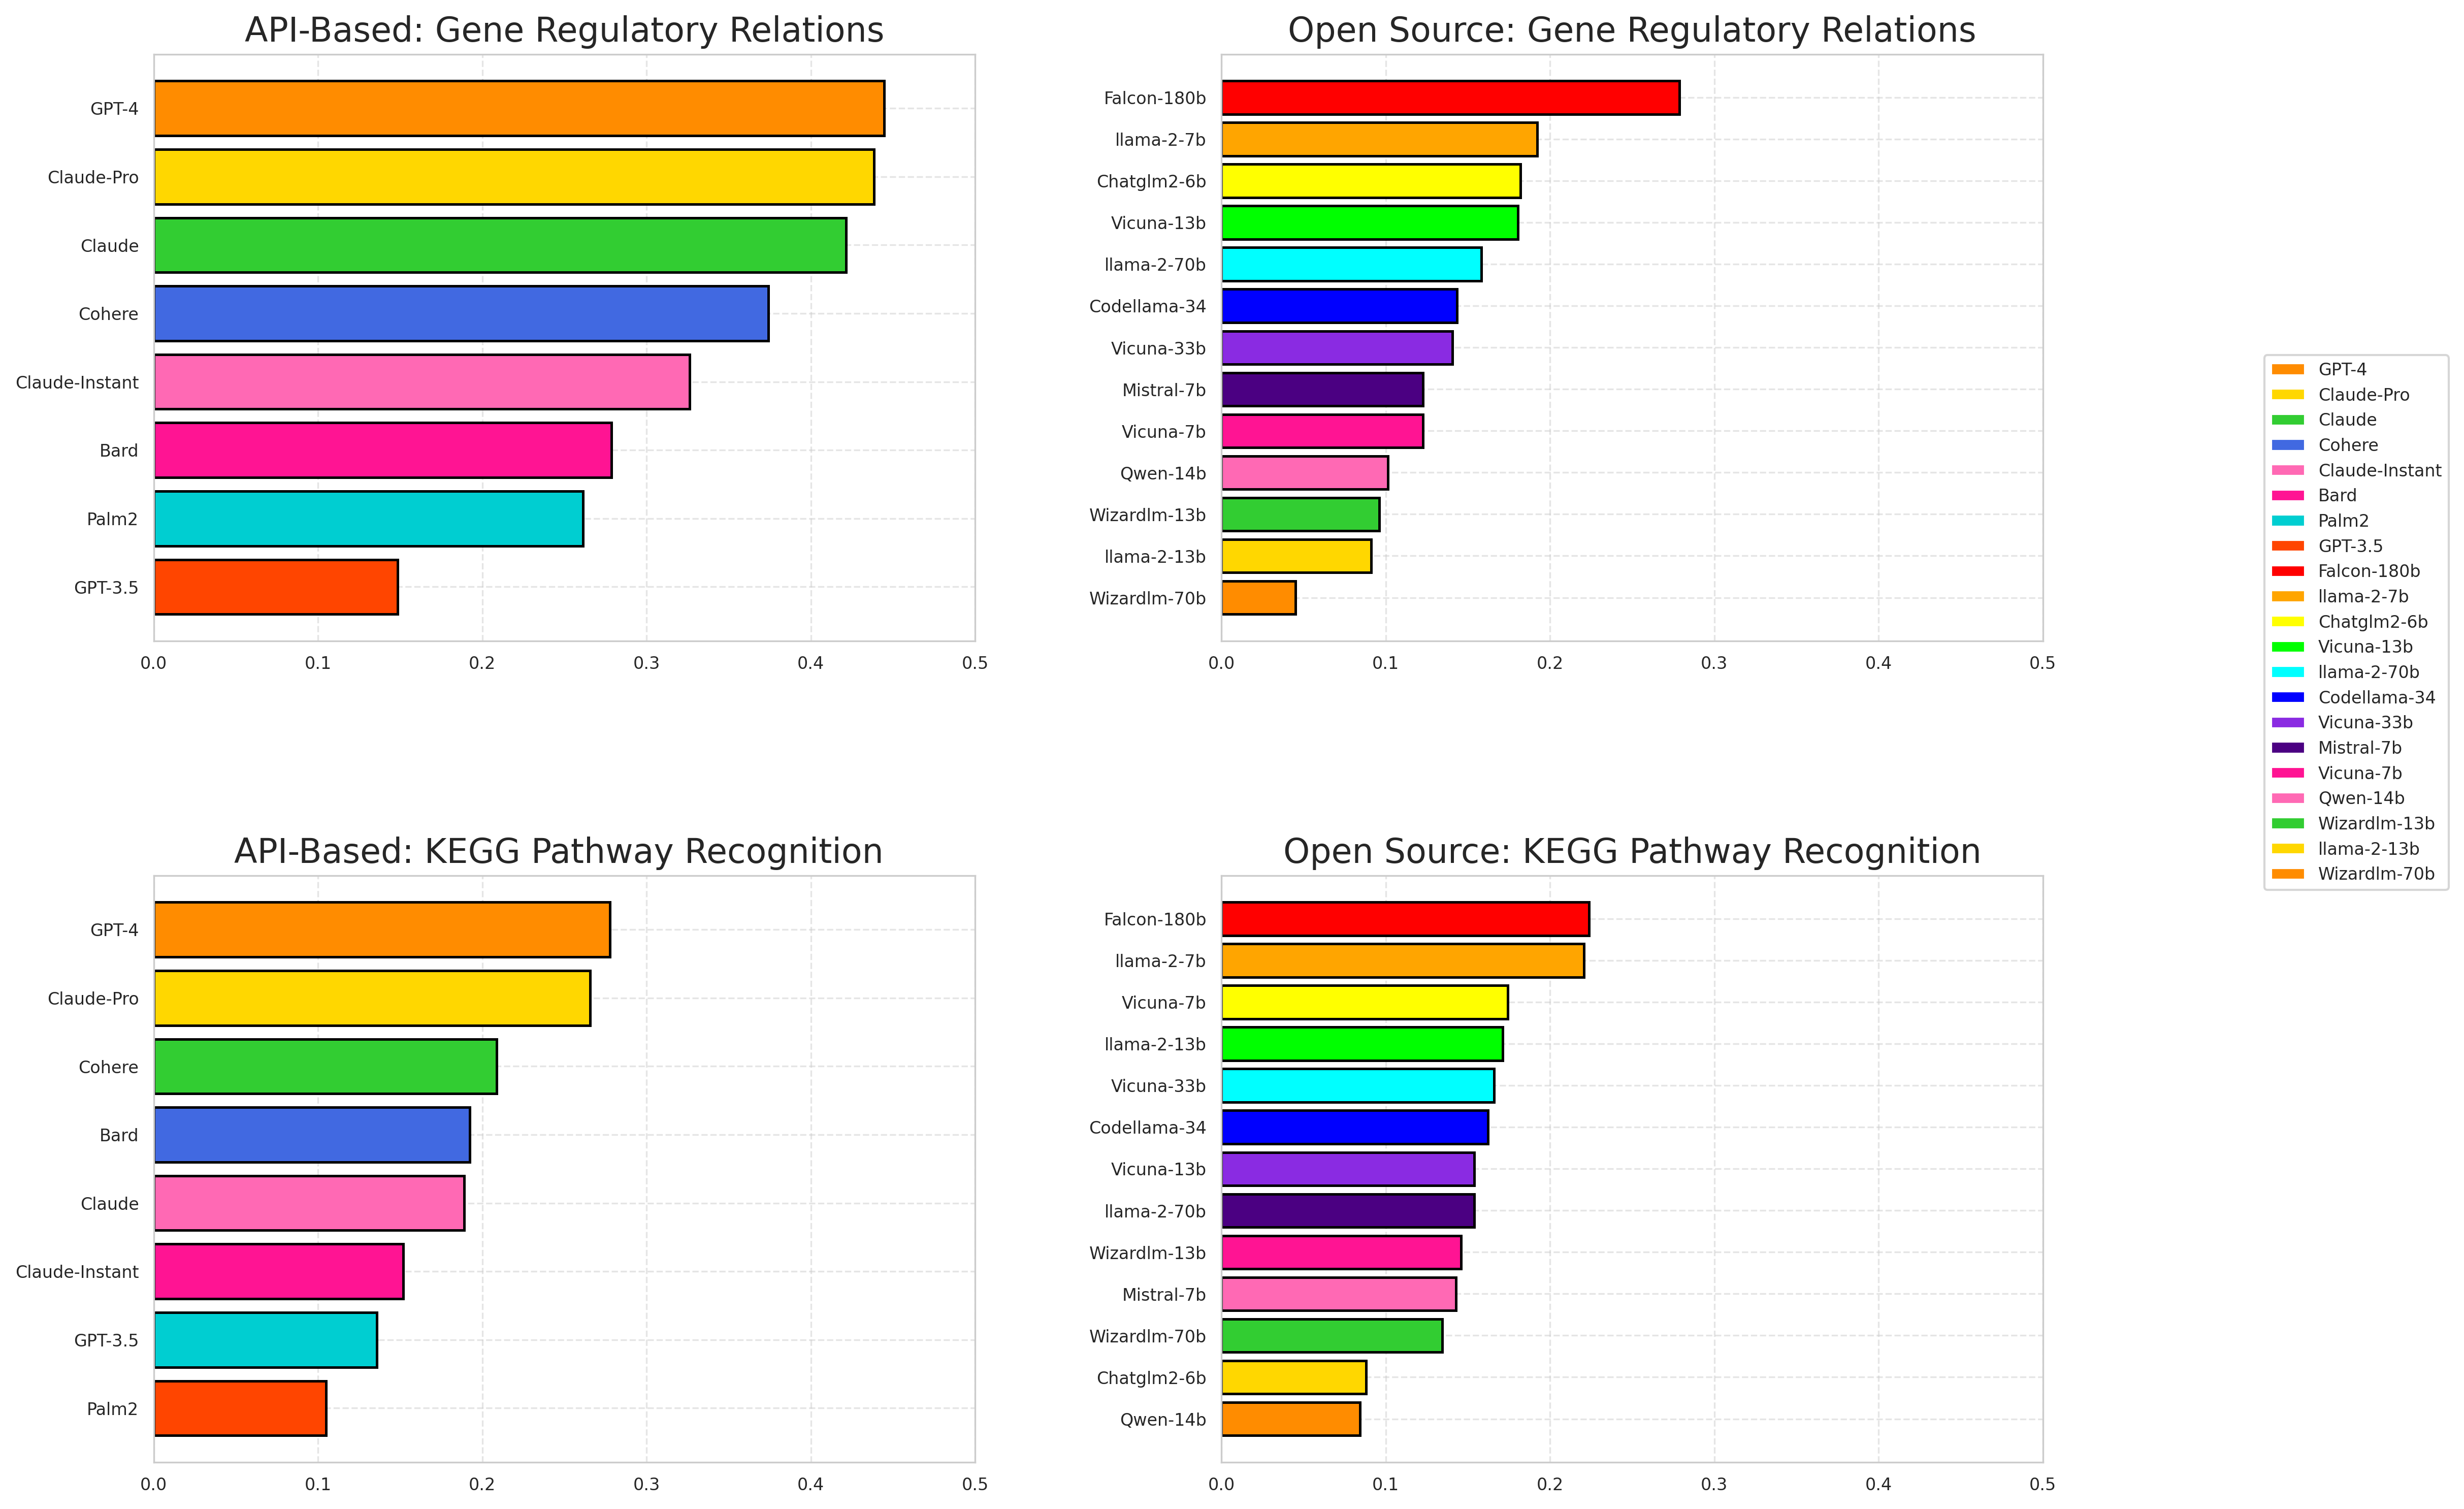

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define even brighter colors for API-based and Open-source models
colors_api = ['#FF8C00', '#FFD700', '#32CD32', '#4169E1', '#FF69B4', '#FF1493', '#00CED1', '#FF4500']
colors_open_source = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#8A2BE2', '#4B0082', '#FF1493', '#FF69B4', '#32CD32', '#FFD700', '#FF8C00']

def plot_performance(api_df, open_source_df):
    fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=300)
    plt.subplots_adjust(wspace=0.30, hspace=0.40)

    title_fontsize = 16
    tick_fontsize = 8

    # Set the font properties
    plt.rc('font', family='DejaVu Sans', size=tick_fontsize)
    plt.rc('axes', titlesize=title_fontsize)
    plt.rc('xtick', labelsize=tick_fontsize)
    plt.rc('ytick', labelsize=tick_fontsize)

    # Set background color
    sns.set_style("whitegrid")

    # Sorting the dataframes
    api_df_sorted_gene = api_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    api_df_sorted_kegg = api_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)
    open_source_df_sorted_gene = open_source_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    open_source_df_sorted_kegg = open_source_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)

    # Plotting API-based models
    for i, (model, color) in enumerate(zip(api_df_sorted_gene['Model'], colors_api)):
        axs[0, 0].barh(model, api_df_sorted_gene.loc[api_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 0].set_title('API-Based: Gene Regulatory Relations', fontsize=title_fontsize)
    axs[0, 0].invert_yaxis()
    axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 0].set_xlim(0.0, 0.5)
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(api_df_sorted_kegg['Model'], colors_api)):
        axs[1, 0].barh(model, api_df_sorted_kegg.loc[api_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 0].set_title('API-Based: KEGG Pathway Recognition ', fontsize=title_fontsize)
    axs[1, 0].invert_yaxis()
    axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 0].set_xlim(0.0, 0.5)
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)

    # Plotting Open-source models
    for i, (model, color) in enumerate(zip(open_source_df_sorted_gene['Model'], colors_open_source)):
        axs[0, 1].barh(model, open_source_df_sorted_gene.loc[open_source_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 1].set_title('Open Source: Gene Regulatory Relations', fontsize=title_fontsize)
    axs[0, 1].invert_yaxis()
    axs[0, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 1].set_xlim(0.0, 0.5)
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(open_source_df_sorted_kegg['Model'], colors_open_source)):
        axs[1, 1].barh(model, open_source_df_sorted_kegg.loc[open_source_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 1].set_title('Open Source: KEGG Pathway Recognition', fontsize=title_fontsize)
    axs[1, 1].invert_yaxis()
    axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 1].set_xlim(0.0, 0.5)
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)

    # Create a legend outside of the subplots
    api_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_api]
    open_source_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_open_source]
    fig.legend(api_patches + open_source_patches, api_df_sorted_gene['Model'].tolist() + open_source_df_sorted_gene['Model'].tolist(),
               loc='upper right', fontsize=tick_fontsize, bbox_to_anchor=(1.07, 0.72))

    plt.show()

# Create sample data
api_data = {
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Claude-Pro', 'Palm2', 'Bard'],
    'Gene Regulatory Relations (F1)': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785],
    'KEGG Pathway Recognition (Mean)': [0.1890, 0.1519, 0.1358, 0.2089, 0.2778, 0.2657, 0.1048, 0.1923]
}

open_source_data = {
    'Model': ['Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama-2-70b', 'llama-2-13b', 'llama-2-7b', 'Qwen-14b'],
    'Gene Regulatory Relations (F1)': [0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'KEGG Pathway Recognition (Mean)': [0.1622, 0.1345, 0.1459, 0.2237, 0.1428, 0.0881, 0.1744, 0.1658, 0.1540, 0.1540, 0.1712, 0.2207, 0.0842]
}

# Convert data to DataFrame
api_df = pd.DataFrame(api_data)
open_source_df = pd.DataFrame(open_source_data)

# Plot the performance
plot_performance(api_df, open_source_df)


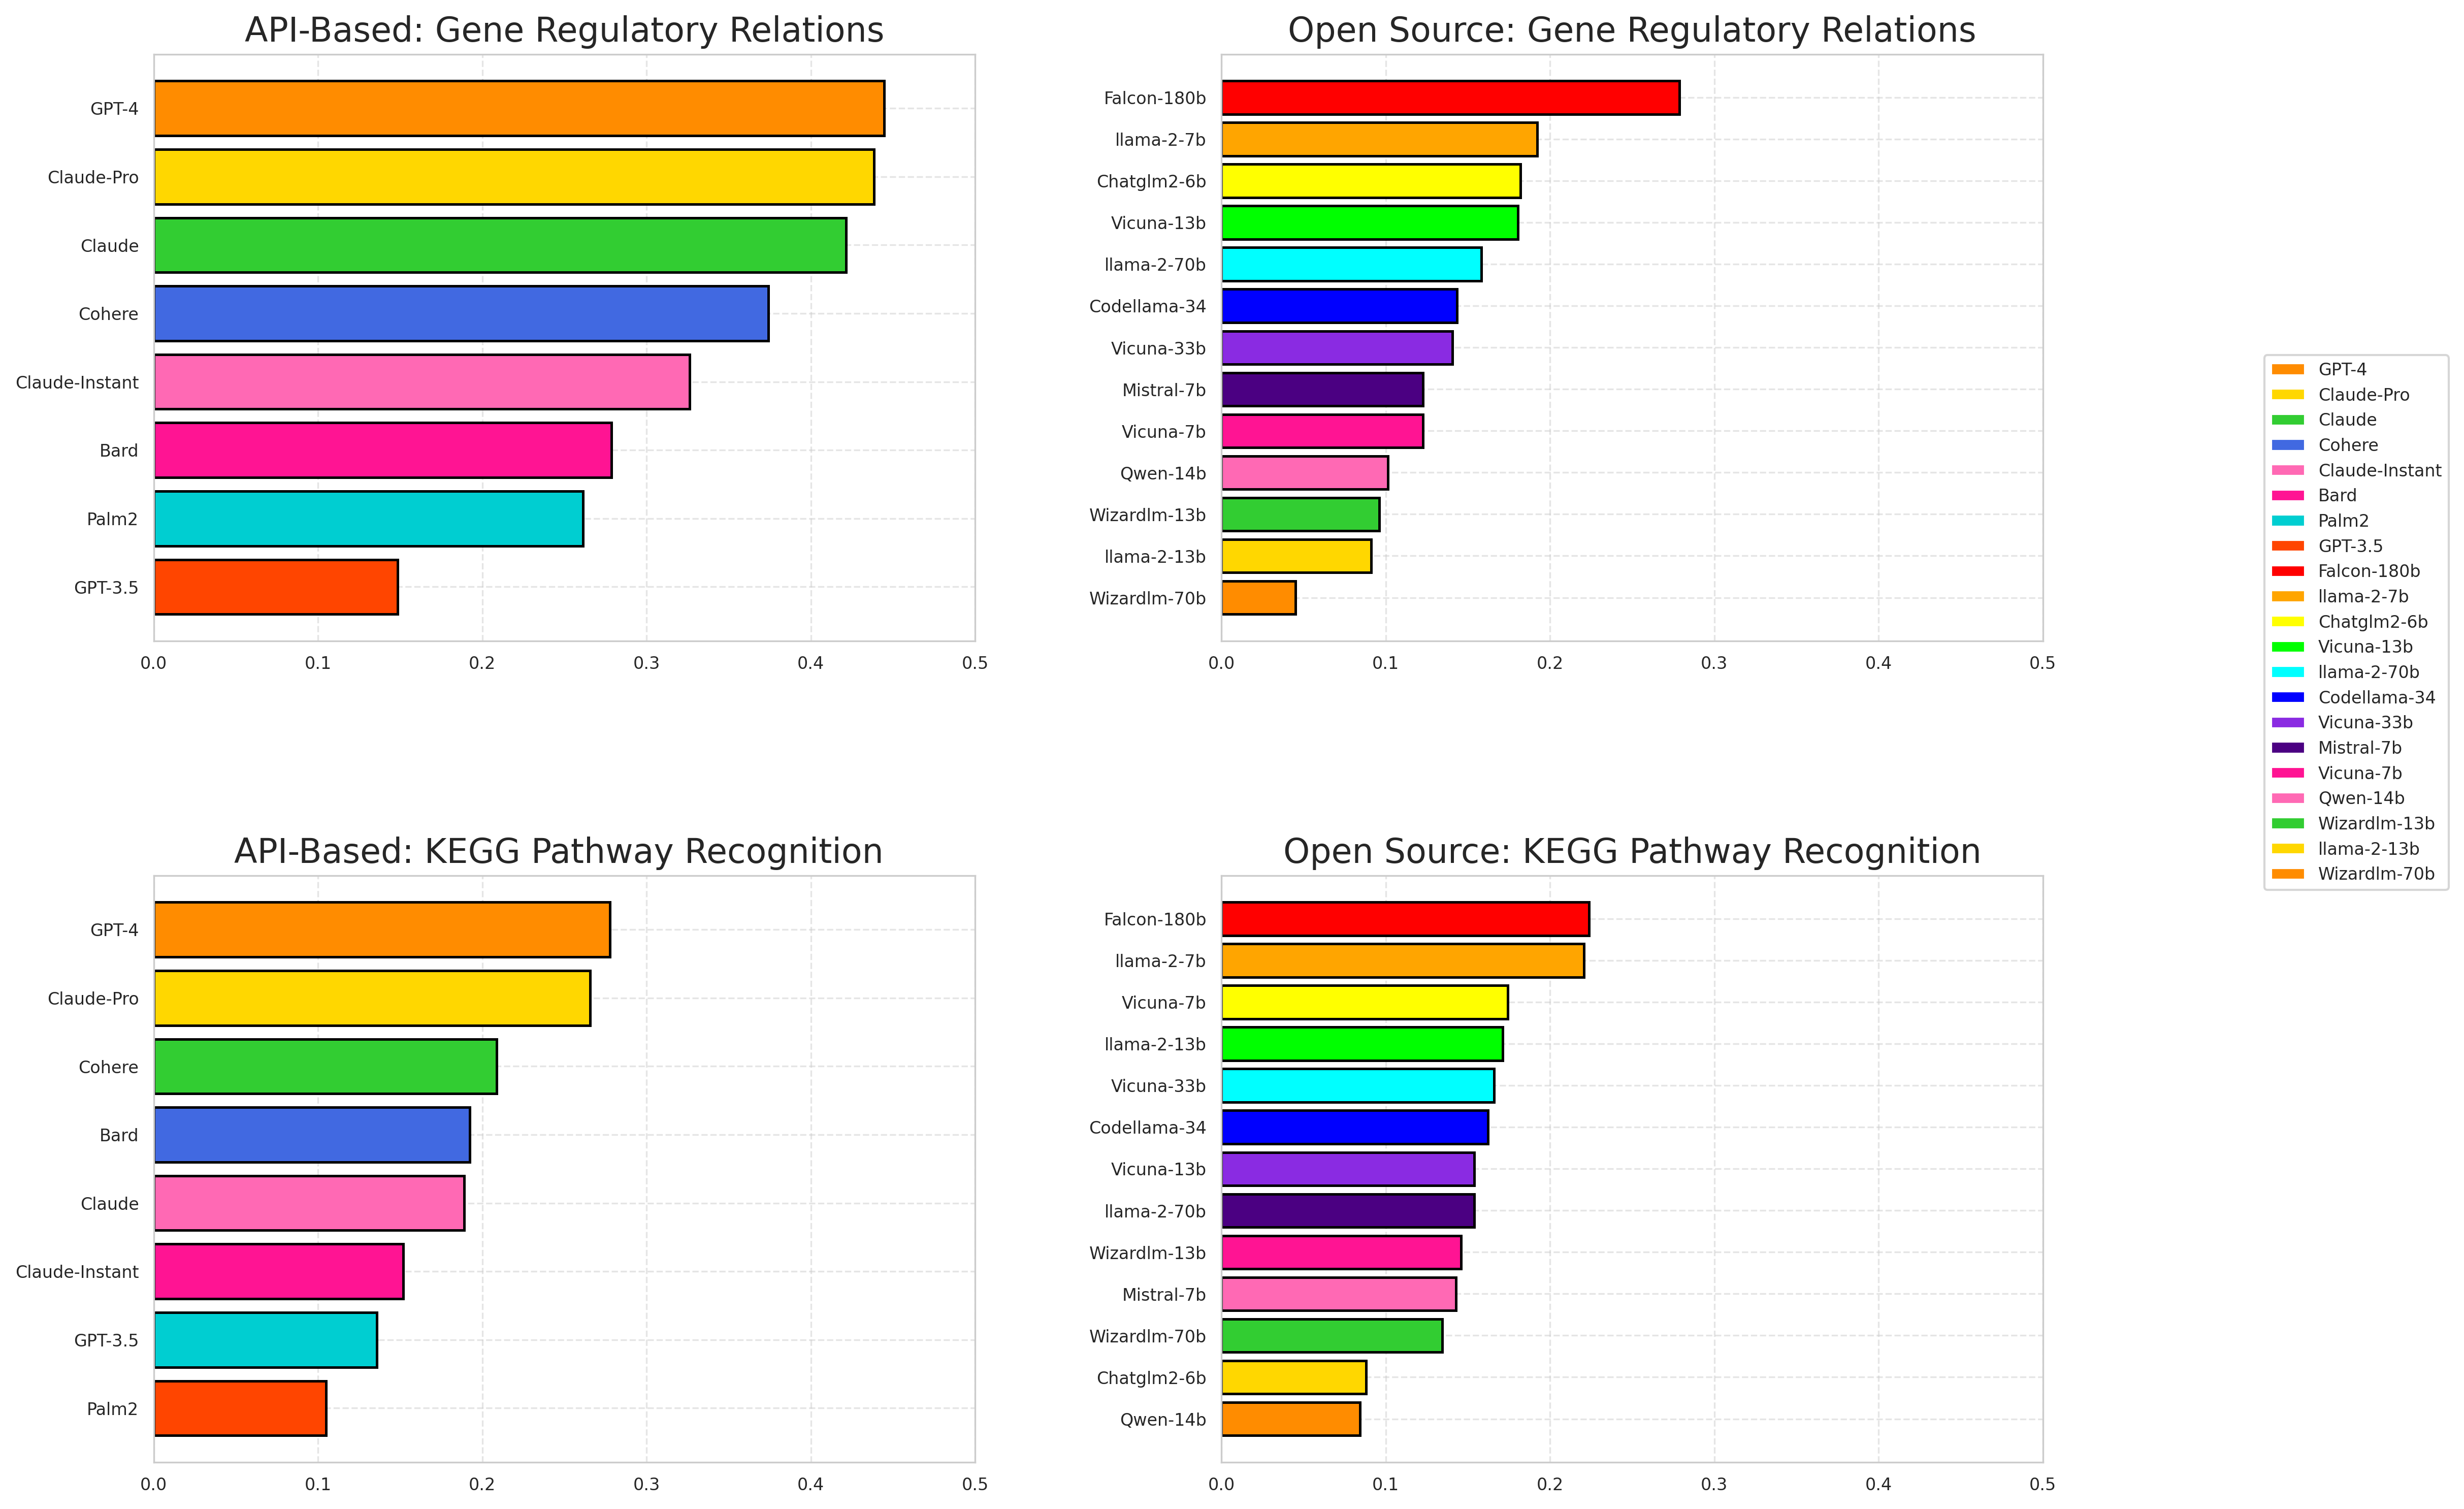

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define even brighter colors for API-based and Open-source models
colors_api = ['#FF8C00', '#FFD700', '#32CD32', '#4169E1', '#FF69B4', '#FF1493', '#00CED1', '#FF4500']
colors_open_source = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#8A2BE2', '#4B0082', '#FF1493', '#FF69B4', '#32CD32', '#FFD700', '#FF8C00']

def plot_performance(api_df, open_source_df):
    fig, axs = plt.subplots(2, 2, figsize=(16, 12), dpi=300)
    plt.subplots_adjust(wspace=0.30, hspace=0.40)

    title_fontsize = 16
    tick_fontsize = 8

    # Set the font properties
    plt.rc('font', family='DejaVu Sans', size=tick_fontsize)
    plt.rc('axes', titlesize=title_fontsize)
    plt.rc('xtick', labelsize=tick_fontsize)
    plt.rc('ytick', labelsize=tick_fontsize)

    # Set background color
    sns.set_style("whitegrid")

    # Sorting the dataframes
    api_df_sorted_gene = api_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    api_df_sorted_kegg = api_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)
    open_source_df_sorted_gene = open_source_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    open_source_df_sorted_kegg = open_source_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)

    # Plotting API-based models
    for i, (model, color) in enumerate(zip(api_df_sorted_gene['Model'], colors_api)):
        axs[0, 0].barh(model, api_df_sorted_gene.loc[api_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 0].set_title('API-Based: Gene Regulatory Relations', fontsize=title_fontsize)
    axs[0, 0].invert_yaxis()
    axs[0, 0].tick_params(axis='both', which='major', labelsize=8)  # Font size set to 8
    axs[0, 0].set_xlim(0.0, 0.5)
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(api_df_sorted_kegg['Model'], colors_api)):
        axs[1, 0].barh(model, api_df_sorted_kegg.loc[api_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 0].set_title('API-Based: KEGG Pathway Recognition ', fontsize=title_fontsize)
    axs[1, 0].invert_yaxis()
    axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 0].set_xlim(0.0, 0.5)
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)

    # Plotting Open-source models
    for i, (model, color) in enumerate(zip(open_source_df_sorted_gene['Model'], colors_open_source)):
        axs[0, 1].barh(model, open_source_df_sorted_gene.loc[open_source_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 1].set_title('Open Source: Gene Regulatory Relations', fontsize=title_fontsize)
    axs[0, 1].invert_yaxis()
    axs[0, 1].tick_params(axis='both', which='major', labelsize=8)  # Font size set to 8
    axs[0, 1].set_xlim(0.0, 0.5)
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(open_source_df_sorted_kegg['Model'], colors_open_source)):
        axs[1, 1].barh(model, open_source_df_sorted_kegg.loc[open_source_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 1].set_title('Open Source: KEGG Pathway Recognition', fontsize=title_fontsize)
    axs[1, 1].invert_yaxis()
    axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 1].set_xlim(0.0, 0.5)
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)

    # Create a legend outside of the subplots
    api_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_api]
    open_source_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_open_source]
    fig.legend(api_patches + open_source_patches, api_df_sorted_gene['Model'].tolist() + open_source_df_sorted_gene['Model'].tolist(),
               loc='upper right', fontsize=tick_fontsize, bbox_to_anchor=(1.07, 0.72))

    plt.show()

# Create sample data
api_data = {
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Claude-Pro', 'Palm2', 'Bard'],
    'Gene Regulatory Relations (F1)': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785],
    'KEGG Pathway Recognition (Mean)': [0.1890, 0.1519, 0.1358, 0.2089, 0.2778, 0.2657, 0.1048, 0.1923]
}

open_source_data = {
    'Model': ['Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama-2-70b', 'llama-2-13b', 'llama-2-7b', 'Qwen-14b'],
    'Gene Regulatory Relations (F1)': [0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'KEGG Pathway Recognition (Mean)': [0.1622, 0.1345, 0.1459, 0.2237, 0.1428, 0.0881, 0.1744, 0.1658, 0.1540, 0.1540, 0.1712, 0.2207, 0.0842]
}

# Convert data to DataFrame
api_df = pd.DataFrame(api_data)
open_source_df = pd.DataFrame(open_source_data)

# Plot the performance
plot_performance(api_df, open_source_df)


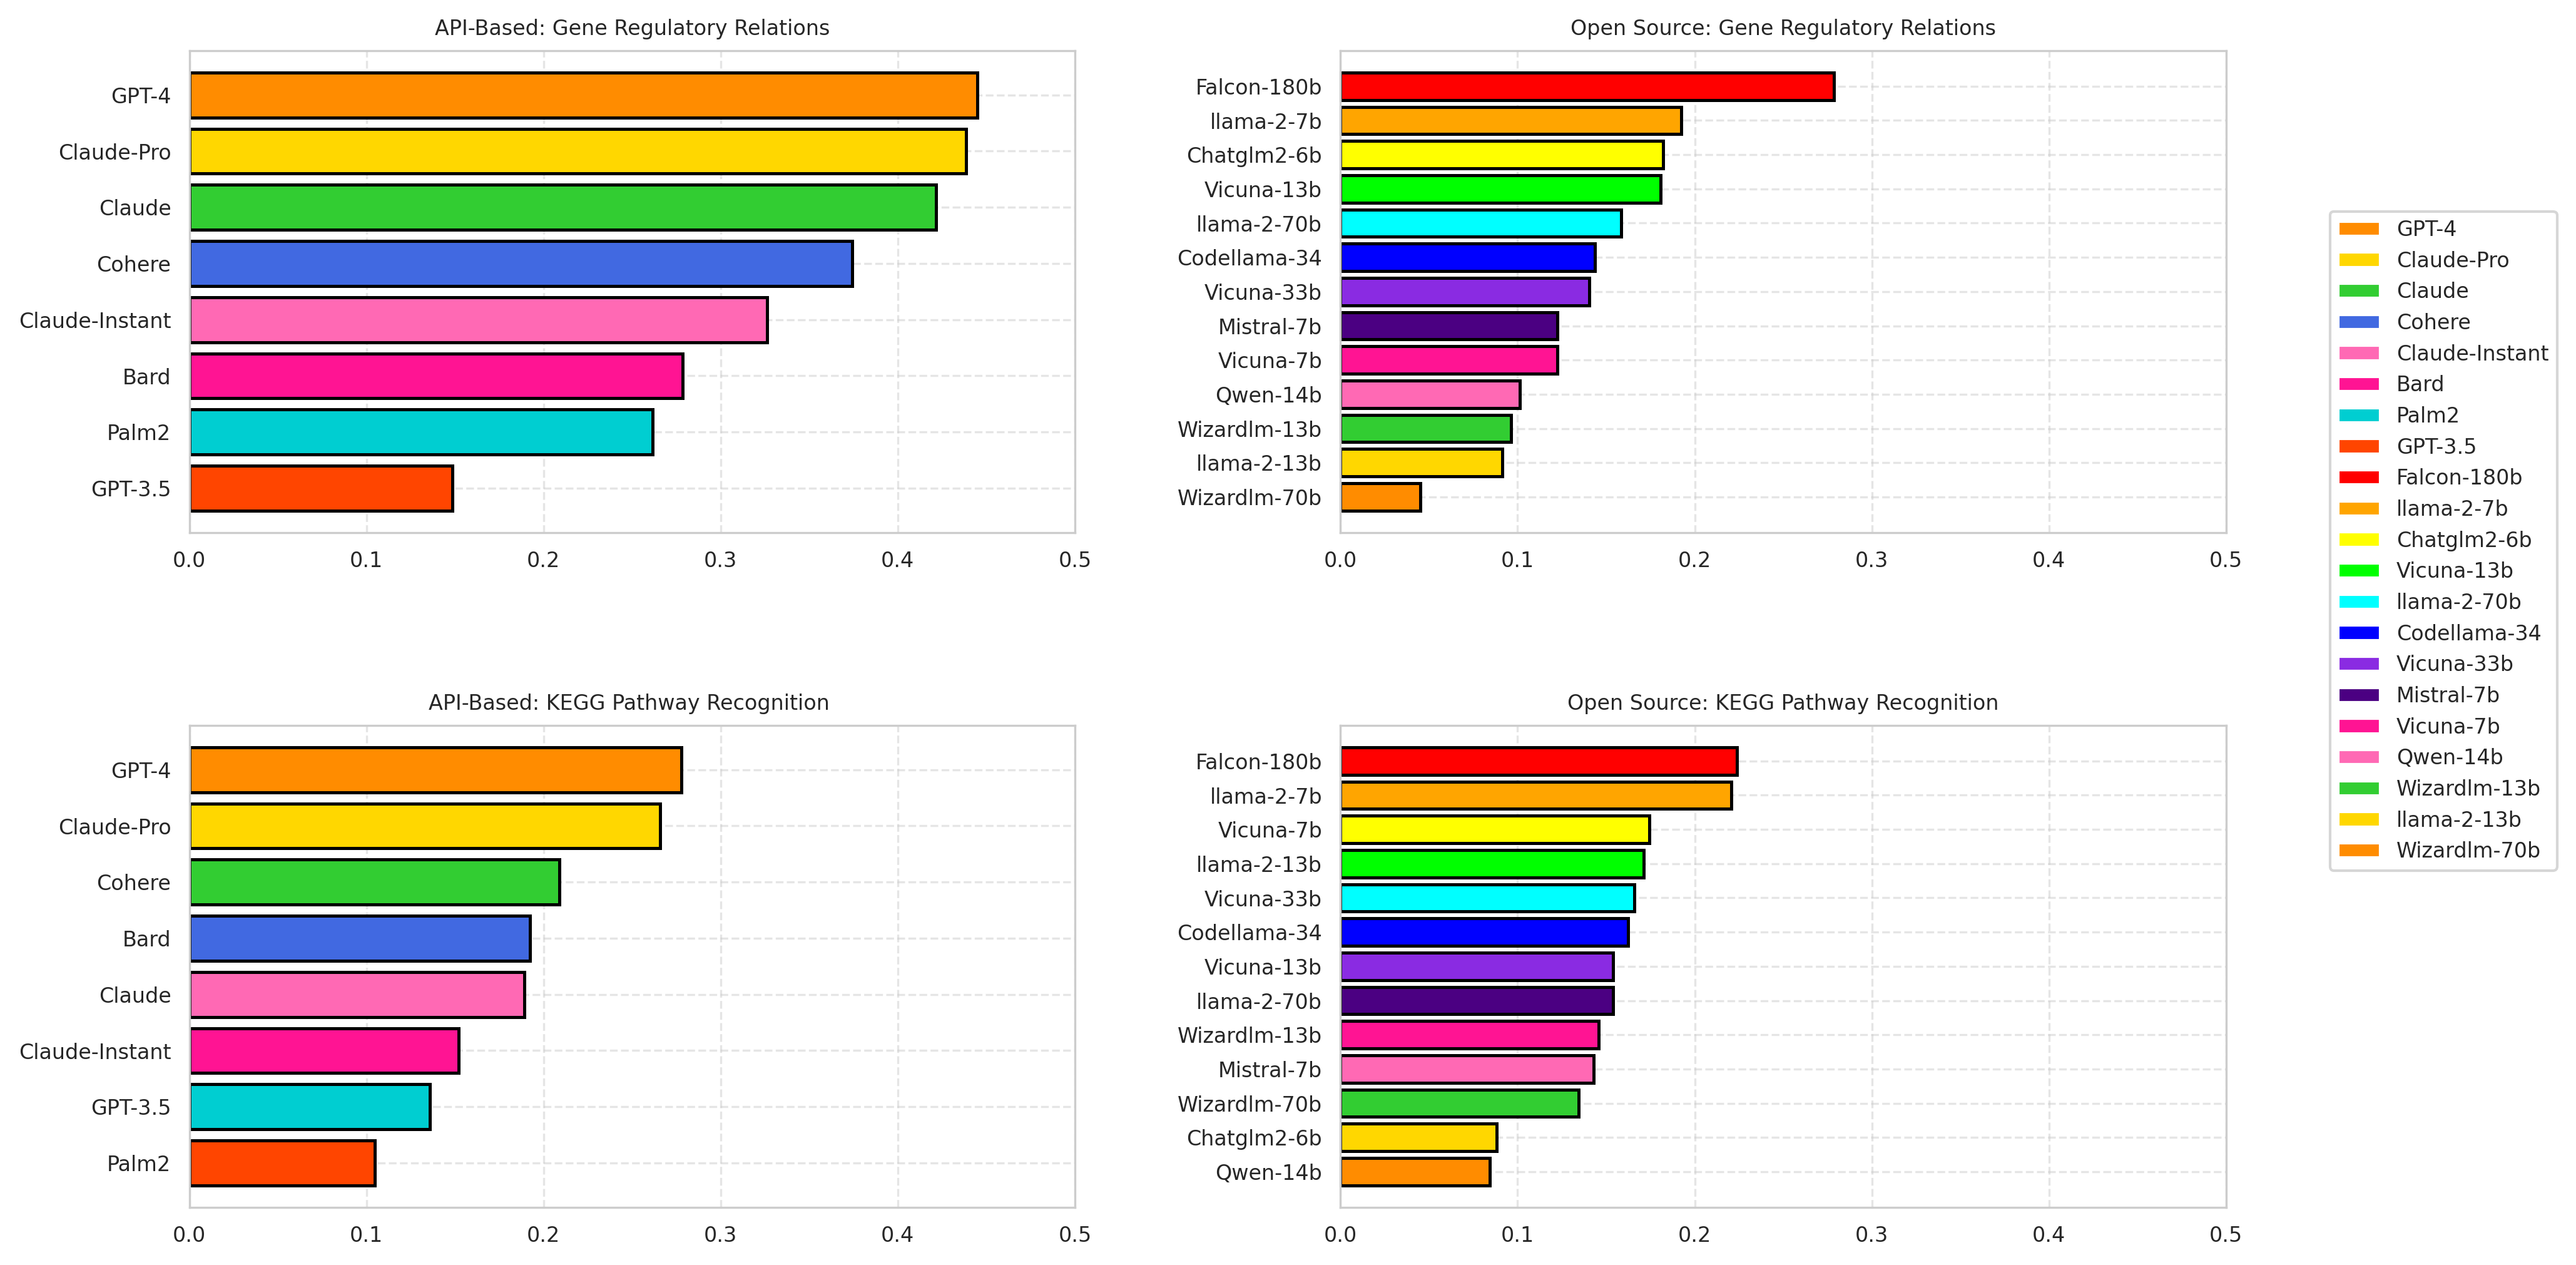

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define even brighter colors for API-based and Open-source models
colors_api = ['#FF8C00', '#FFD700', '#32CD32', '#4169E1', '#FF69B4', '#FF1493', '#00CED1', '#FF4500']
colors_open_source = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#8A2BE2', '#4B0082', '#FF1493', '#FF69B4', '#32CD32', '#FFD700', '#FF8C00']

def plot_performance(api_df, open_source_df):
    fig, axs = plt.subplots(2, 2, figsize=(14, 8), dpi=300)
    plt.subplots_adjust(wspace=0.30, hspace=0.40)

    tick_fontsize = 8

    # Set the font properties
    plt.rc('font', family='DejaVu Sans', size=tick_fontsize)
    plt.rc('axes', titlesize=tick_fontsize)
    plt.rc('xtick', labelsize=tick_fontsize)
    plt.rc('ytick', labelsize=tick_fontsize)
    plt.rc('legend', fontsize=tick_fontsize)

    # Set background color
    sns.set_style("whitegrid")

    # Sorting the dataframes
    api_df_sorted_gene = api_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    api_df_sorted_kegg = api_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)
    open_source_df_sorted_gene = open_source_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    open_source_df_sorted_kegg = open_source_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)

    # Plotting API-based models
    for i, (model, color) in enumerate(zip(api_df_sorted_gene['Model'], colors_api)):
        axs[0, 0].barh(model, api_df_sorted_gene.loc[api_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 0].set_title('API-Based: Gene Regulatory Relations', fontsize=tick_fontsize)
    axs[0, 0].invert_yaxis()
    axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 0].set_xlim(0.0, 0.5)
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(api_df_sorted_kegg['Model'], colors_api)):
        axs[1, 0].barh(model, api_df_sorted_kegg.loc[api_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 0].set_title('API-Based: KEGG Pathway Recognition ', fontsize=tick_fontsize)
    axs[1, 0].invert_yaxis()
    axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 0].set_xlim(0.0, 0.5)
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)

    # Plotting Open-source models
    for i, (model, color) in enumerate(zip(open_source_df_sorted_gene['Model'], colors_open_source)):
        axs[0, 1].barh(model, open_source_df_sorted_gene.loc[open_source_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 1].set_title('Open Source: Gene Regulatory Relations', fontsize=tick_fontsize)
    axs[0, 1].invert_yaxis()
    axs[0, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 1].set_xlim(0.0, 0.5)
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(open_source_df_sorted_kegg['Model'], colors_open_source)):
        axs[1, 1].barh(model, open_source_df_sorted_kegg.loc[open_source_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 1].set_title('Open Source: KEGG Pathway Recognition', fontsize=tick_fontsize)
    axs[1, 1].invert_yaxis()
    axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 1].set_xlim(0.0, 0.5)
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)

    # Create a legend outside of the subplots
    api_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_api]
    open_source_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_open_source]
    fig.legend(api_patches + open_source_patches, api_df_sorted_gene['Model'].tolist() + open_source_df_sorted_gene['Model'].tolist(),
               loc='upper right', fontsize=tick_fontsize, bbox_to_anchor=(1.03, 0.78))

    plt.show()

# Create sample data
api_data = {
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Claude-Pro', 'Palm2', 'Bard'],
    'Gene Regulatory Relations (F1)': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785],
    'KEGG Pathway Recognition (Mean)': [0.1890, 0.1519, 0.1358, 0.2089, 0.2778, 0.2657, 0.1048, 0.1923]
}

open_source_data = {
    'Model': ['Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama-2-70b', 'llama-2-13b', 'llama-2-7b', 'Qwen-14b'],
    'Gene Regulatory Relations (F1)': [0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'KEGG Pathway Recognition (Mean)': [0.1622, 0.1345, 0.1459, 0.2237, 0.1428, 0.0881, 0.1744, 0.1658, 0.1540, 0.1540, 0.1712, 0.2207, 0.0842]
}

# Convert data to DataFrame
api_df = pd.DataFrame(api_data)
open_source_df = pd.DataFrame(open_source_data)

# Plot the performance
plot_performance(api_df, open_source_df)


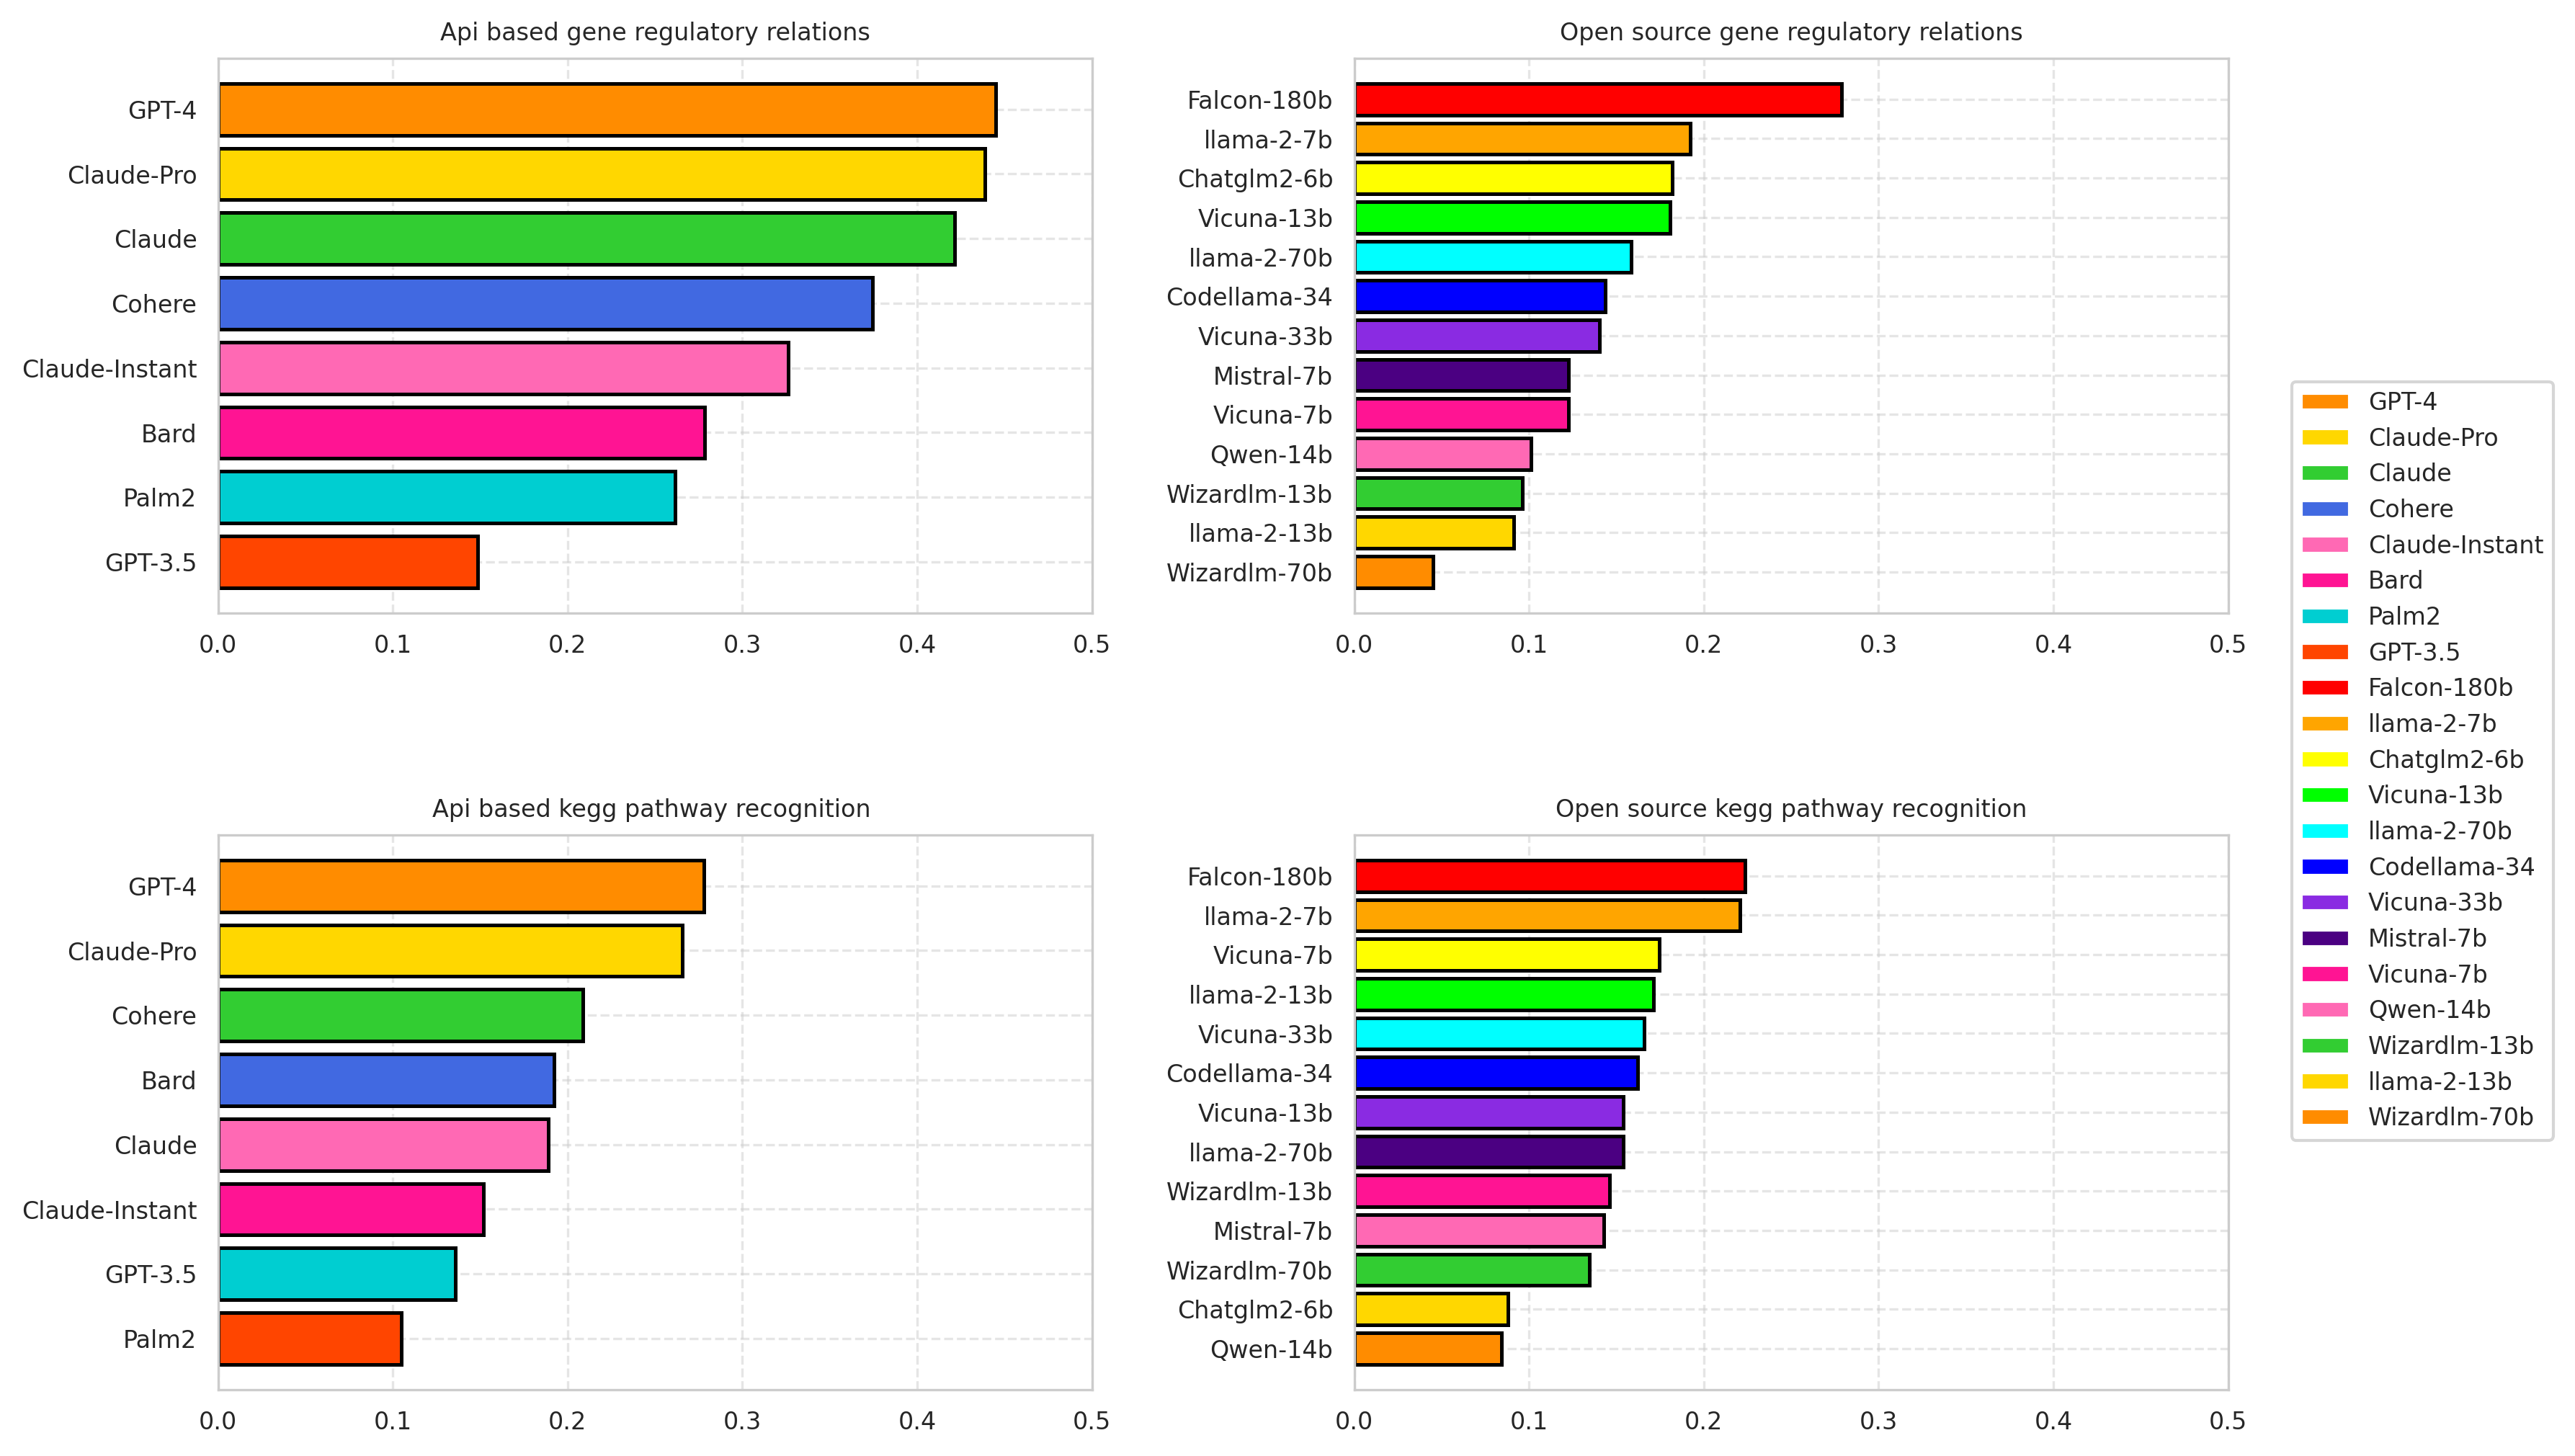

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Define even brighter colors for API-based and Open-source models
colors_api = ['#FF8C00', '#FFD700', '#32CD32', '#4169E1', '#FF69B4', '#FF1493', '#00CED1', '#FF4500']
colors_open_source = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#8A2BE2', '#4B0082', '#FF1493', '#FF69B4', '#32CD32', '#FFD700', '#FF8C00']

def plot_performance(api_df, open_source_df):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)
    plt.subplots_adjust(wspace=0.30, hspace=0.40)

    tick_fontsize = 8

    # Set the font properties
    plt.rc('font', family='DejaVu Sans', size=tick_fontsize)
    plt.rc('axes', titlesize=tick_fontsize)
    plt.rc('xtick', labelsize=tick_fontsize)
    plt.rc('ytick', labelsize=tick_fontsize)
    plt.rc('legend', fontsize=tick_fontsize)

    # Set background color
    sns.set_style("whitegrid")

    # Sorting the dataframes
    api_df_sorted_gene = api_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    api_df_sorted_kegg = api_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)
    open_source_df_sorted_gene = open_source_df.sort_values(by='Gene Regulatory Relations (F1)', ascending=False)
    open_source_df_sorted_kegg = open_source_df.sort_values(by='KEGG Pathway Recognition (Mean)', ascending=False)

    # Plotting API-based models
    for i, (model, color) in enumerate(zip(api_df_sorted_gene['Model'], colors_api)):
        axs[0, 0].barh(model, api_df_sorted_gene.loc[api_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 0].set_title('Api based gene regulatory relations', fontsize=tick_fontsize)
    axs[0, 0].invert_yaxis()
    axs[0, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 0].set_xlim(0.0, 0.5)
    axs[0, 0].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(api_df_sorted_kegg['Model'], colors_api)):
        axs[1, 0].barh(model, api_df_sorted_kegg.loc[api_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 0].set_title('Api based kegg pathway recognition ', fontsize=tick_fontsize)
    axs[1, 0].invert_yaxis()
    axs[1, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 0].set_xlim(0.0, 0.5)
    axs[1, 0].grid(True, linestyle='--', alpha=0.5)

    # Plotting Open-source models
    for i, (model, color) in enumerate(zip(open_source_df_sorted_gene['Model'], colors_open_source)):
        axs[0, 1].barh(model, open_source_df_sorted_gene.loc[open_source_df_sorted_gene['Model'] == model, 'Gene Regulatory Relations (F1)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[0, 1].set_title('Open source gene regulatory relations', fontsize=tick_fontsize)
    axs[0, 1].invert_yaxis()
    axs[0, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[0, 1].set_xlim(0.0, 0.5)
    axs[0, 1].grid(True, linestyle='--', alpha=0.5)

    for i, (model, color) in enumerate(zip(open_source_df_sorted_kegg['Model'], colors_open_source)):
        axs[1, 1].barh(model, open_source_df_sorted_kegg.loc[open_source_df_sorted_kegg['Model'] == model, 'KEGG Pathway Recognition (Mean)'],
                       color=color, edgecolor='black', linewidth=1.2)
    axs[1, 1].set_title('Open source kegg pathway recognition', fontsize=tick_fontsize)
    axs[1, 1].invert_yaxis()
    axs[1, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
    axs[1, 1].set_xlim(0.0, 0.5)
    axs[1, 1].grid(True, linestyle='--', alpha=0.5)

    # Create a legend outside of the subplots
    api_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_api]
    open_source_patches = [plt.Rectangle((0,0),1,1,fc=color) for color in colors_open_source]
    fig.legend(api_patches + open_source_patches, api_df_sorted_gene['Model'].tolist() + open_source_df_sorted_gene['Model'].tolist(),
               loc='upper right', fontsize=tick_fontsize, bbox_to_anchor=(1.03, 0.70))

    plt.show()

# Create sample data
api_data = {
    'Model': ['Claude', 'Claude-Instant', 'GPT-3.5', 'Cohere', 'GPT-4', 'Claude-Pro', 'Palm2', 'Bard'],
    'Gene Regulatory Relations (F1)': [0.4215, 0.3263, 0.1485, 0.3742, 0.4448, 0.4386, 0.2614, 0.2785],
    'KEGG Pathway Recognition (Mean)': [0.1890, 0.1519, 0.1358, 0.2089, 0.2778, 0.2657, 0.1048, 0.1923]
}

open_source_data = {
    'Model': ['Codellama-34', 'Wizardlm-70b', 'Wizardlm-13b', 'Falcon-180b', 'Mistral-7b', 'Chatglm2-6b', 'Vicuna-7b', 'Vicuna-33b', 'Vicuna-13b', 'llama-2-70b', 'llama-2-13b', 'llama-2-7b', 'Qwen-14b'],
    'Gene Regulatory Relations (F1)': [0.1435, 0.0449, 0.0962, 0.2787, 0.1226, 0.1821, 0.1225, 0.1405, 0.1806, 0.1583, 0.0912, 0.1923, 0.1013],
    'KEGG Pathway Recognition (Mean)': [0.1622, 0.1345, 0.1459, 0.2237, 0.1428, 0.0881, 0.1744, 0.1658, 0.1540, 0.1540, 0.1712, 0.2207, 0.0842]
}

# Convert data to DataFrame
api_df = pd.DataFrame(api_data)
open_source_df = pd.DataFrame(open_source_data)

# Plot the performance
plot_performance(api_df, open_source_df)
